In [1]:
import numpy as np
import matplotlib.pyplot as plt
import burst_detector as bd
import seaborn as sns
from scipy.stats import wasserstein_distance
import pandas as pd
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
n_chan = 385
times = np.load('../data/neuropixels_dohoung/KS2.5/phy_in/spike_times.npy').flatten()
clusters = np.load('../data/neuropixels_dohoung/KS2.5/phy_in/spike_clusters.npy').flatten()
mean_wf = np.load("../data/neuropixels_dohoung/KS2.5/phy_in/mean_waveforms.npy")

counts = bd.spikes_per_cluster(clusters)
labels = pd.read_csv("../data/neuropixels_dohoung/KS2.5/phy_in/cluster_group.tsv", sep="\t")

In [3]:
# load raw data
rawData = np.memmap("../data/neuropixels_dohoung/KS2.5/catgt_ANM480363_20210527_pfc320_hpc180_g0/ANM480363_20210527_pfc320_hpc180_g0_imec1/ANM480363_20210527_pfc320_hpc180_g0_tcat.imec1.ap.bin", dtype='int16', mode='r')
data = np.reshape(rawData, (int(rawData.size/n_chan), n_chan))

In [4]:
mean_sim, offset, wf_means_norm = bd.wf_means_similarity(mean_wf)

In [53]:
# using clusters 3 and 6 for cross-projection figures

c1=3; c2=6

# extract spikes
sp_1 = bd.extract_spikes(data, times, clusters, c1)
sp_2 = bd.extract_spikes(data, times, clusters, c2)

# compute cross-projections
proj_1on1, proj_2on1, proj_1on2, proj_2on2 = bd.cross_proj(sp_1, sp_2, wf_means_norm[c1], wf_means_norm[c2])

## Figure A - Common errors

In [304]:
pre = 20
post = 40

In [312]:
pre = 20
post = 20

t1 = int(16.2175*30000)
t2 = int(16.22093333*30000)
t3 = int(16.22453333*30000)

start = int(16.216*30000)
end = int(16.226666666666667*30000)

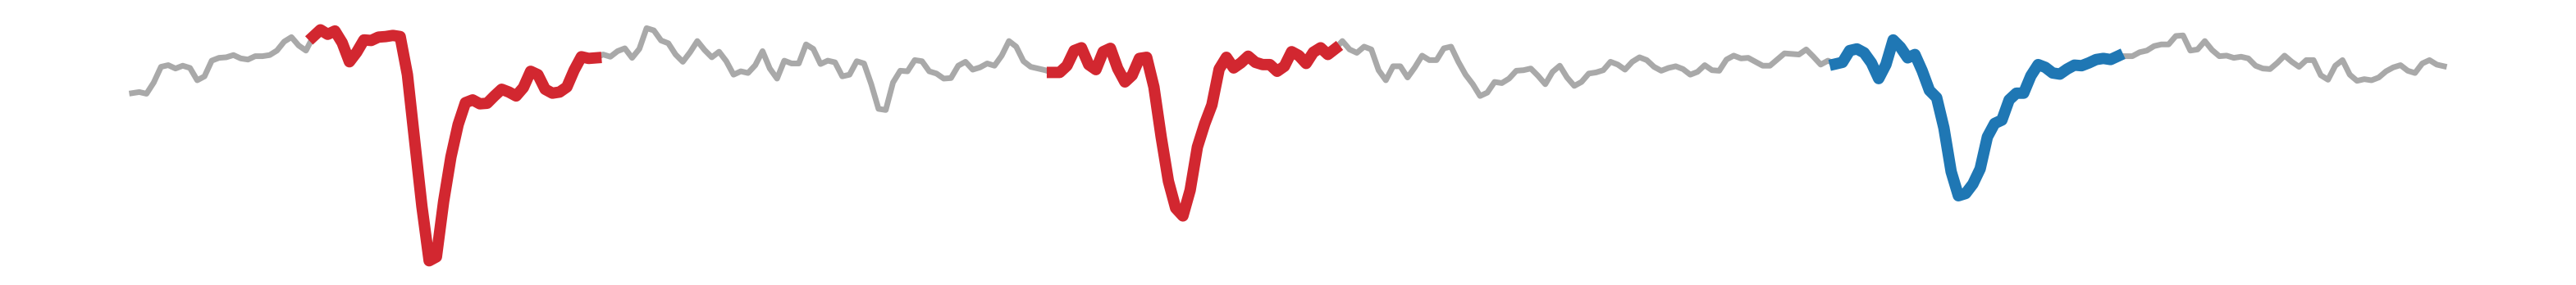

In [317]:
plt.figure(figsize=(20,2))
plt.plot(np.arange(end-start),data[start:end,0], color='darkgrey', linewidth=2.5); plt.ylim(-350, 100); plt.axis('off');
plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,0], color='#D22730', linewidth=5);
plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,0], color='#D22730', linewidth=5);
plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,0], linewidth=5);
plt.savefig("../figures/A/vert_ch0.svg", transparent=True)

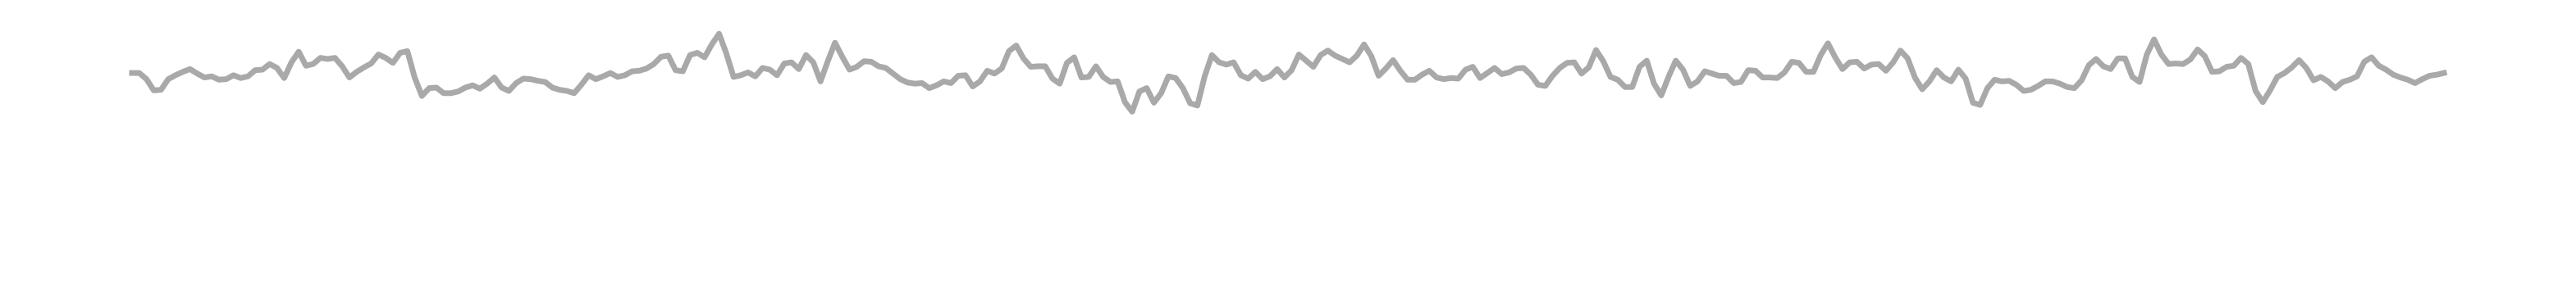

In [321]:
ch=1
plt.figure(figsize=(20,2))
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-350, 100); plt.axis('off');
# plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], linewidth=5);
plt.savefig("../figures/A/vert_ch1.svg", transparent=True)

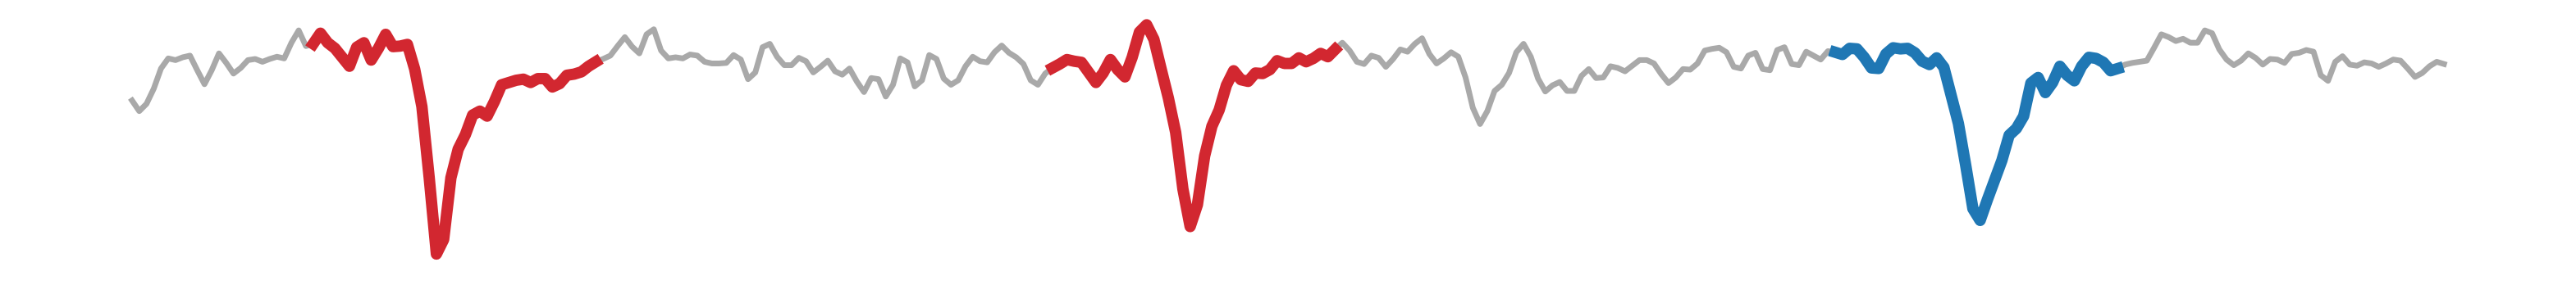

In [323]:
ch=2
plt.figure(figsize=(20,2))
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-350, 100); plt.axis('off');
plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,ch], color='#D22730', linewidth=5);
plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,ch], color='#D22730', linewidth=5);
plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], linewidth=5);
plt.savefig("../figures/A/vert_ch2.svg", transparent=True)

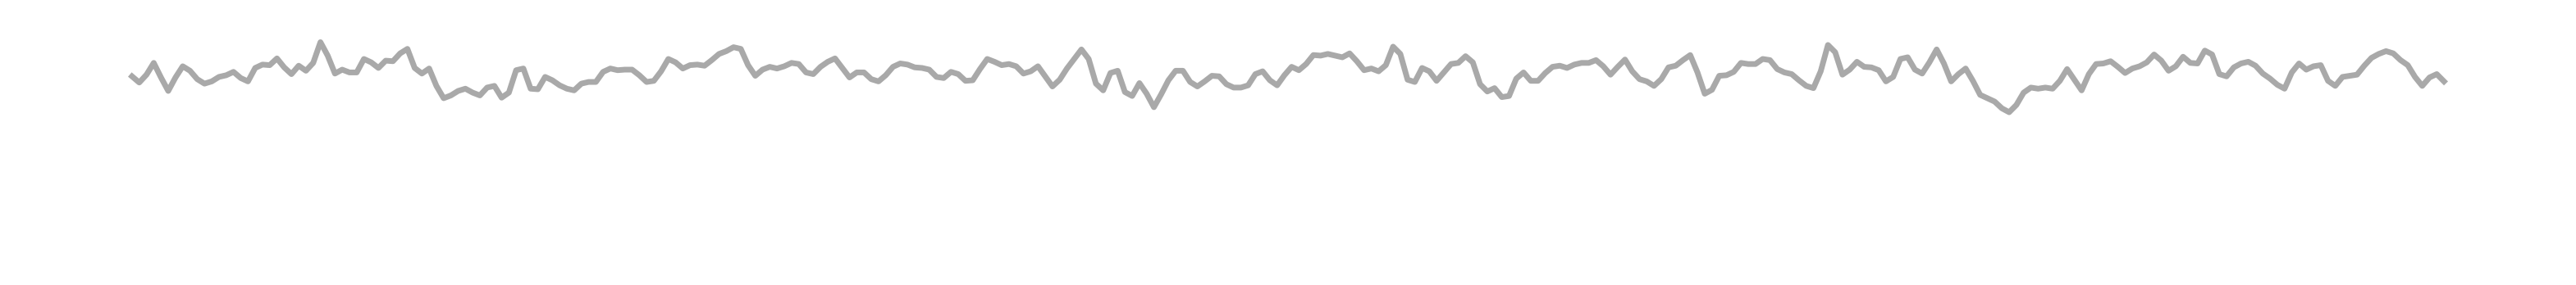

In [326]:
ch=3
plt.figure(figsize=(20,2))
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-350, 100); plt.axis('off');
# plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], linewidth=5);
plt.savefig("../figures/A/vert_ch3.svg", transparent=True)

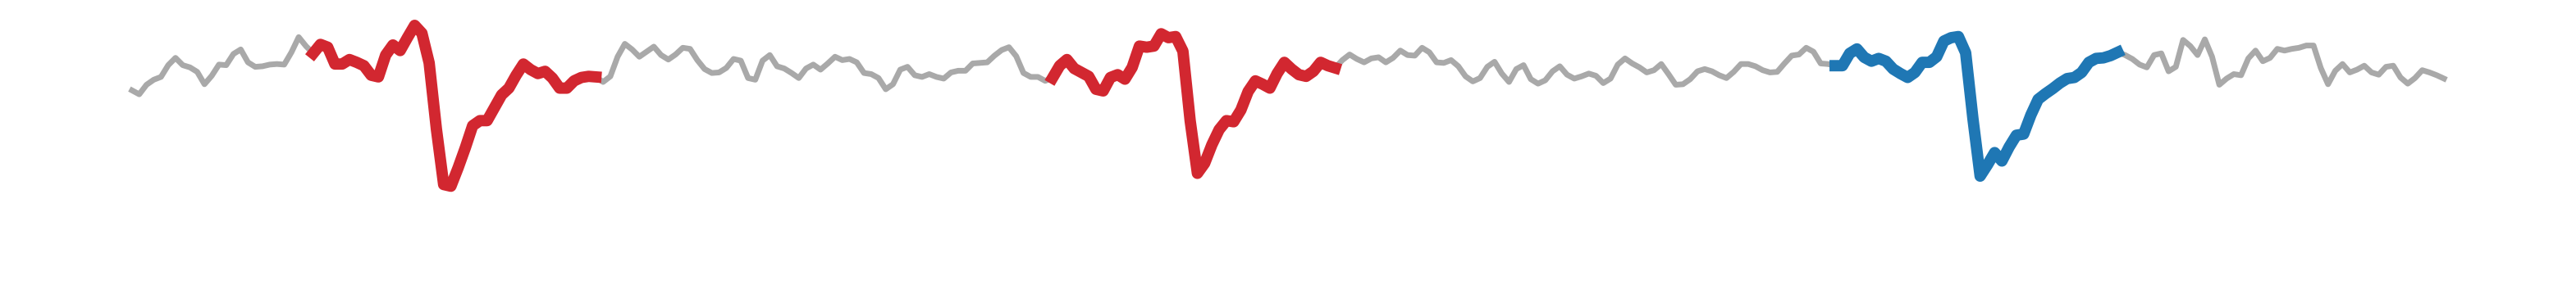

In [328]:
ch=4
plt.figure(figsize=(20,2))
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-350, 100); plt.axis('off');
plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,ch], color='#D22730', linewidth=5);
plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,ch], color='#D22730', linewidth=5);
plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], linewidth=5);
plt.savefig("../figures/A/vert_ch4.svg", transparent=True)

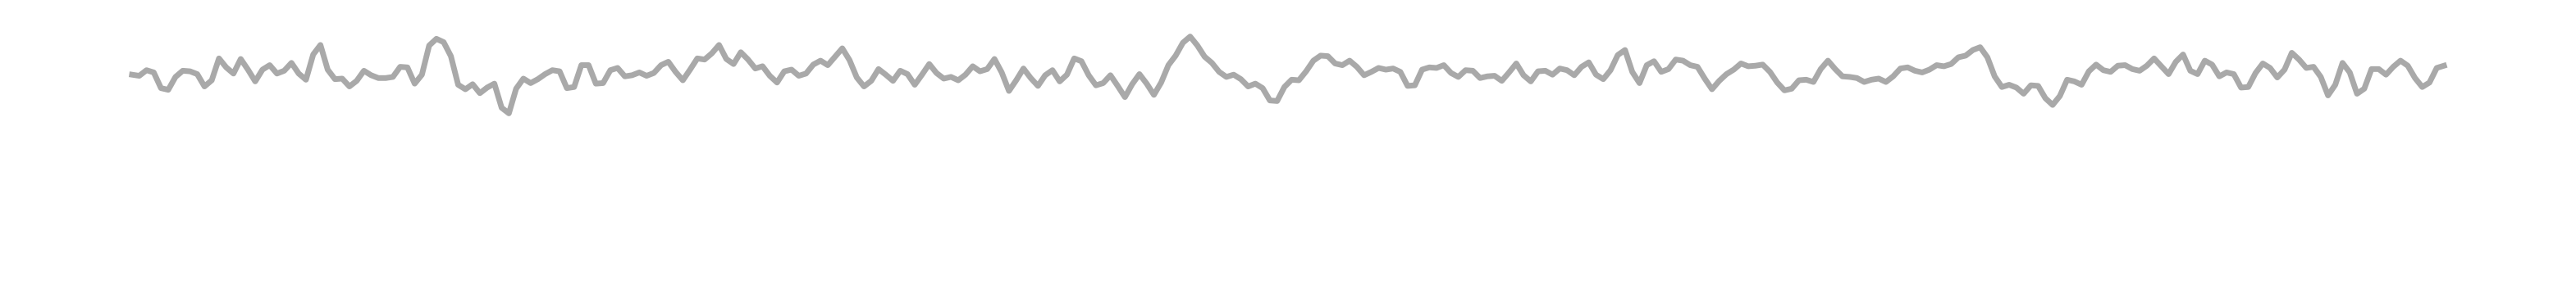

In [330]:
ch=5
plt.figure(figsize=(20,2))
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-350, 100); plt.axis('off');
# plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], linewidth=5);
plt.savefig("../figures/A/vert_ch5.svg", transparent=True)

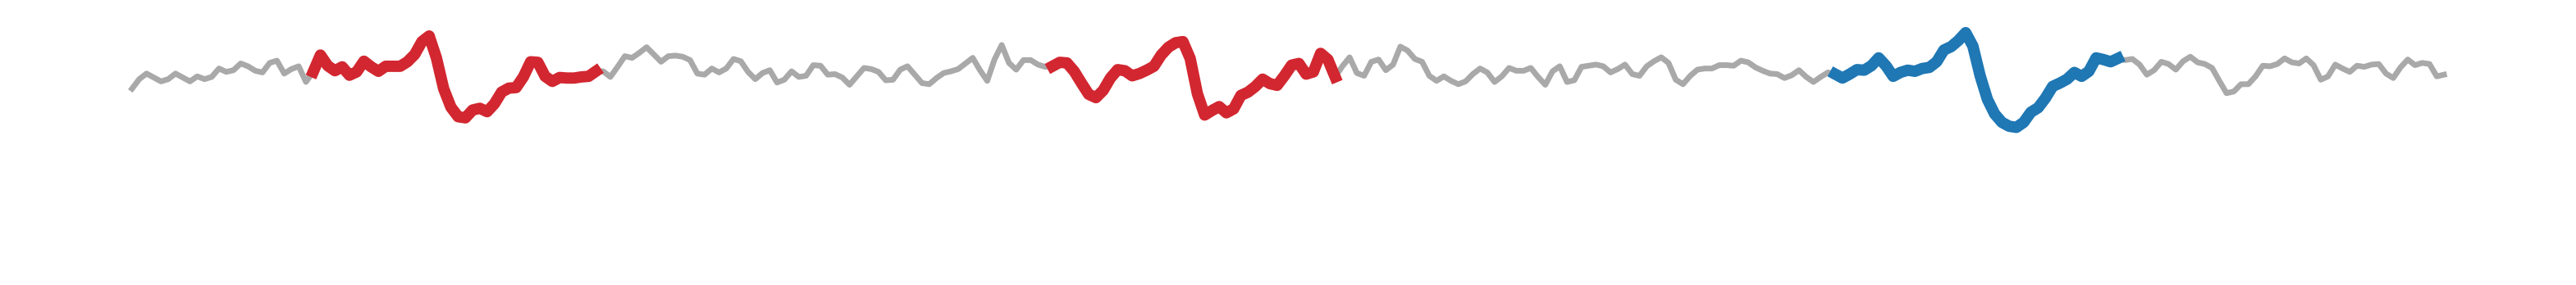

In [332]:
ch=6
plt.figure(figsize=(20,2))
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-350, 100); plt.axis('off');
plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,ch], color='#D22730', linewidth=5);
plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,ch], color='#D22730', linewidth=5);
plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], linewidth=5);
plt.savefig("../figures/A/vert_ch6.svg", transparent=True)

In [432]:
pre = 15
post = 25

t1 = int(183.1724*30000)
t2 = int(183.1766*30000)
t3 = int(183.1819*30000)
t4 = int(183.18813333*30000)

t5 = int(183.19276667*30000)
t6 = int(183.20053333*30000)
t7 = int(183.20243333*30000)
t8 = int(183.21266667*30000)

start = int(183.18*30000)
end = int(183.205*30000)

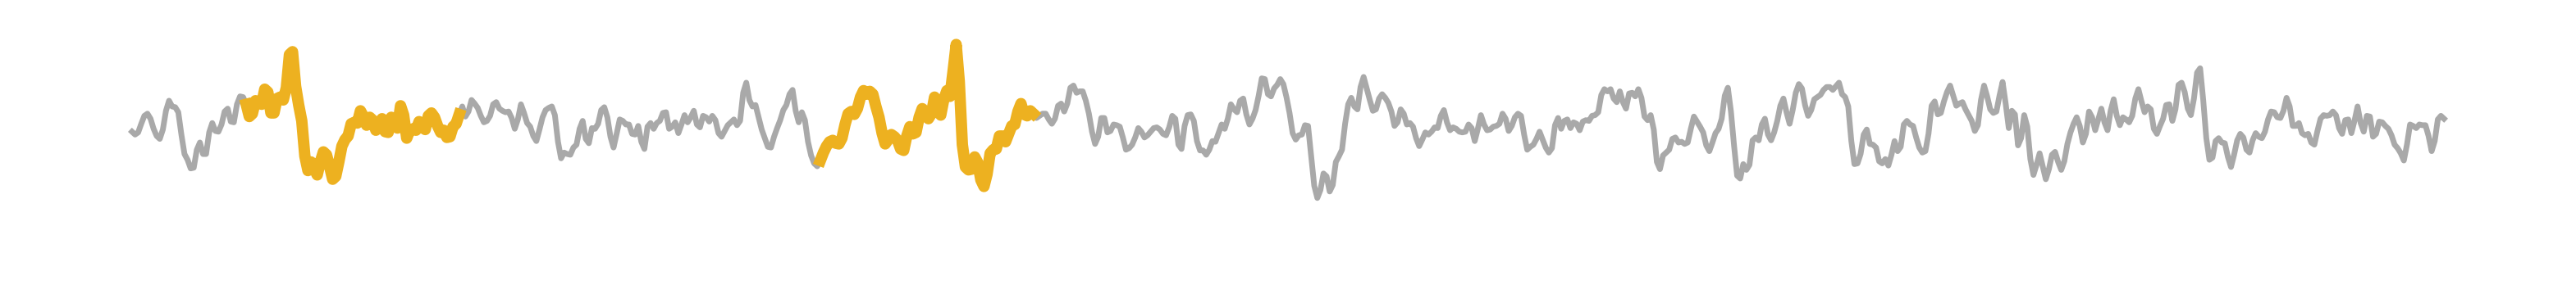

In [525]:
plt.figure(figsize=(20,2))
ch=163
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-200, 150); plt.axis("off")

plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#edb120', linewidth=5);
plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#edb120', linewidth=5);

# plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#1f77b4', linewidth=5);
plt.savefig("../figures/A/hor_ch163.svg", transparent=True)

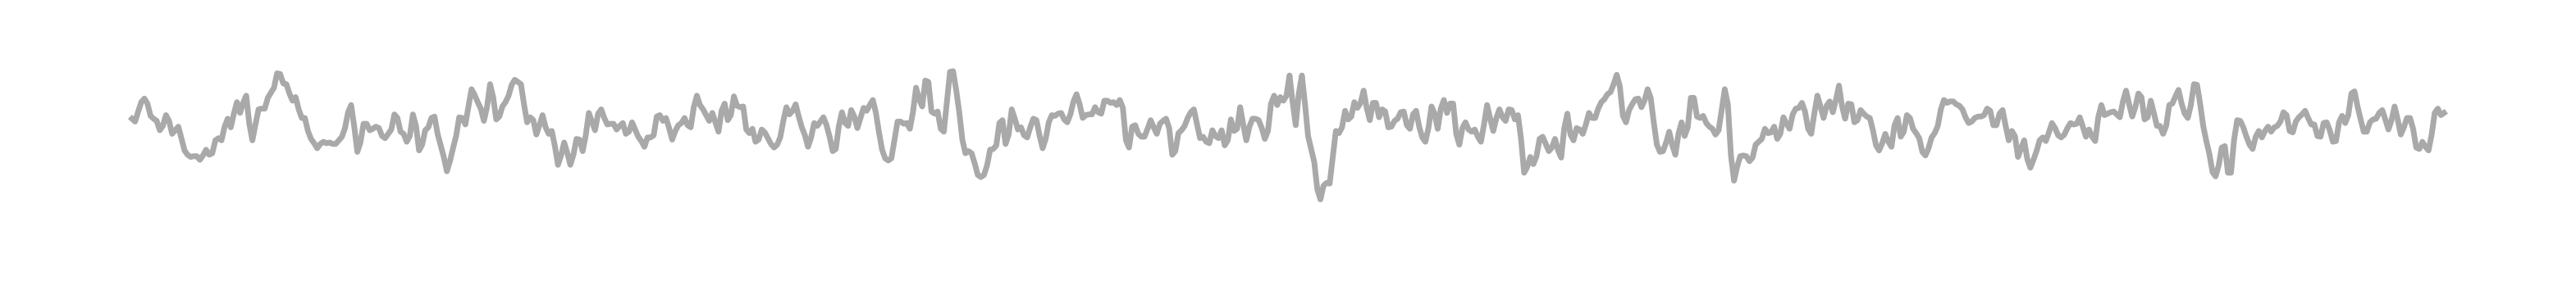

In [461]:
plt.figure(figsize=(20,2))
ch=164
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-200, 150); plt.axis("off")

# plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#D22730', linewidth=5);

# plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t8-pre-start,t8+post-start), data[t8-pre:t8+post,ch], color='#1f77b4', linewidth=5);
plt.savefig("../figures/A/hor_ch164.svg", transparent=True)

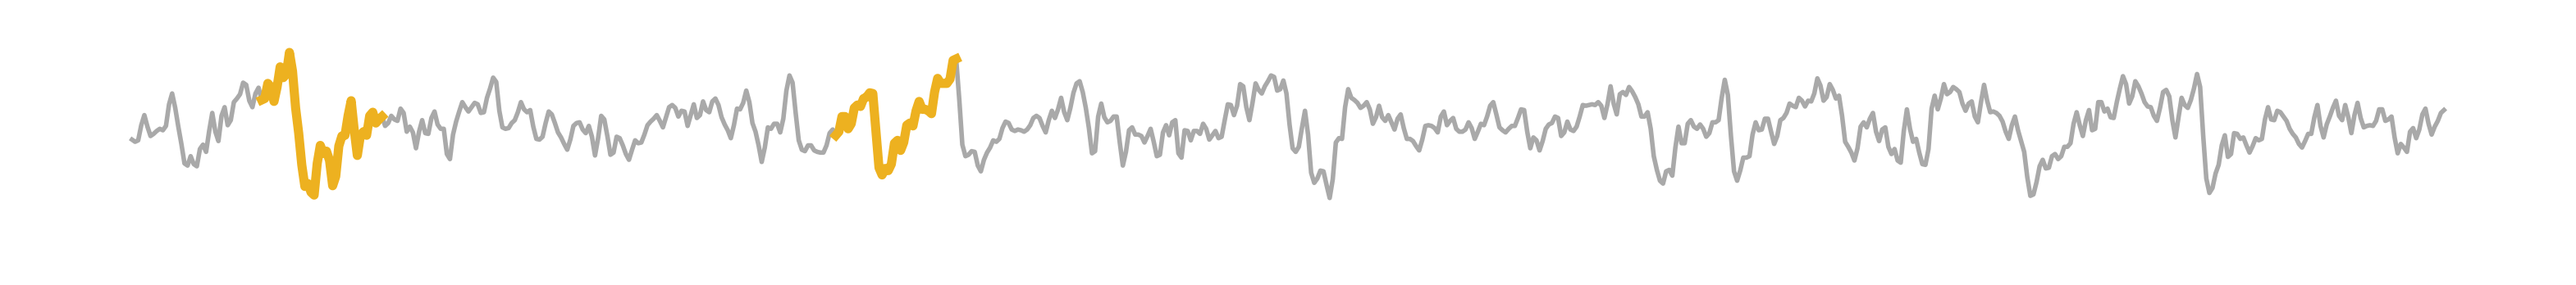

In [470]:
plt.figure(figsize=(20,2))
ch=165
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2); plt.ylim(-200, 150); plt.axis("off")

# plt.plot(np.arange(t1-pre-start,t1+post-start), data[t1-pre:t1+post,ch], color='#D22730', linewidth=4);
# plt.plot(np.arange(t2-pre-start,t2+post-start), data[t2-pre:t2+post,ch], color='#D22730', linewidth=4);
plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#edb120', linewidth=4);
plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#edb120', linewidth=4);

# plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t8-pre-start,t8+post-start), data[t8-pre:t8+post,ch], color='#1f77b4', linewidth=5);
plt.savefig("../figures/A/hor_ch165.svg", transparent=True)

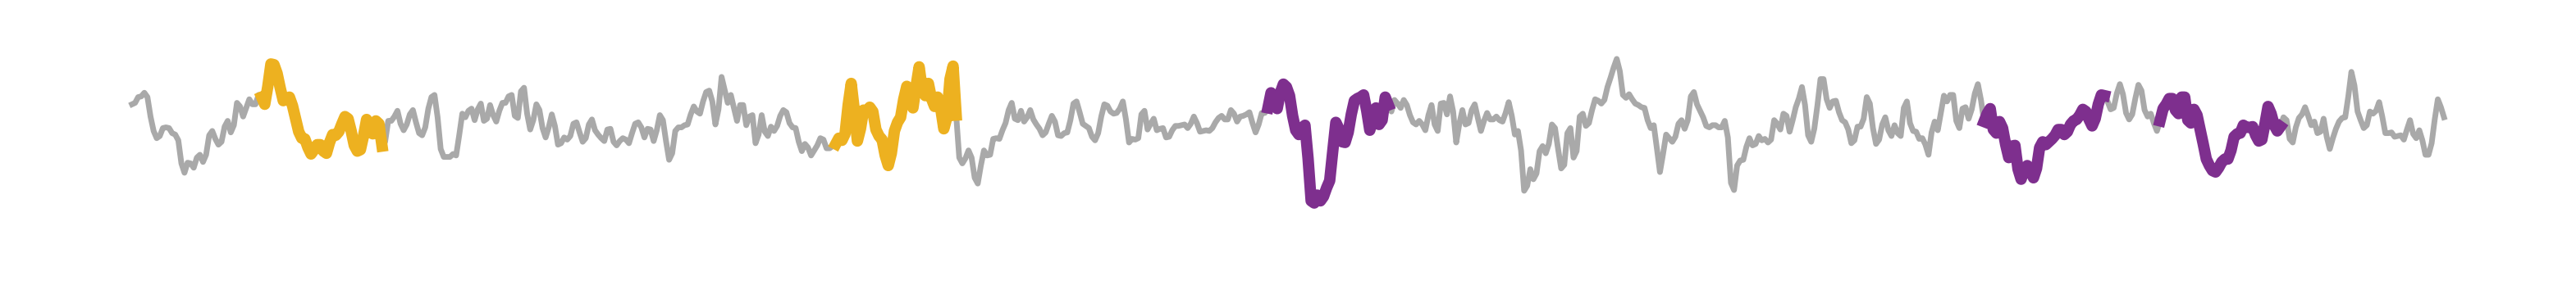

In [473]:
plt.figure(figsize=(20,2))
ch=166
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-200, 150); plt.axis("off")

plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#edb120', linewidth=5);
plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#edb120', linewidth=5);

plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#7e2f8e', linewidth=5);

plt.savefig("../figures/A/hor_ch166.svg", transparent=True)

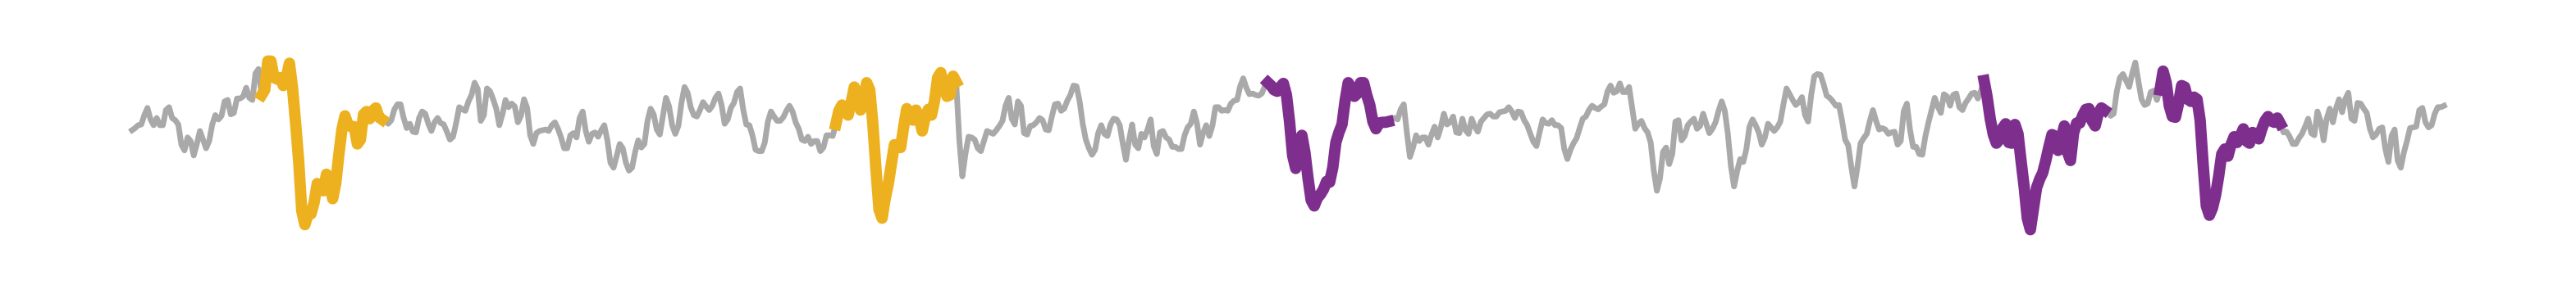

In [474]:
plt.figure(figsize=(20,2))
ch=167
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-200, 150);plt.axis("off")

plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#edb120', linewidth=5);
plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#edb120', linewidth=5);

plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#7e2f8e', linewidth=5);

plt.savefig("../figures/A/hor_ch167.svg", transparent=True)

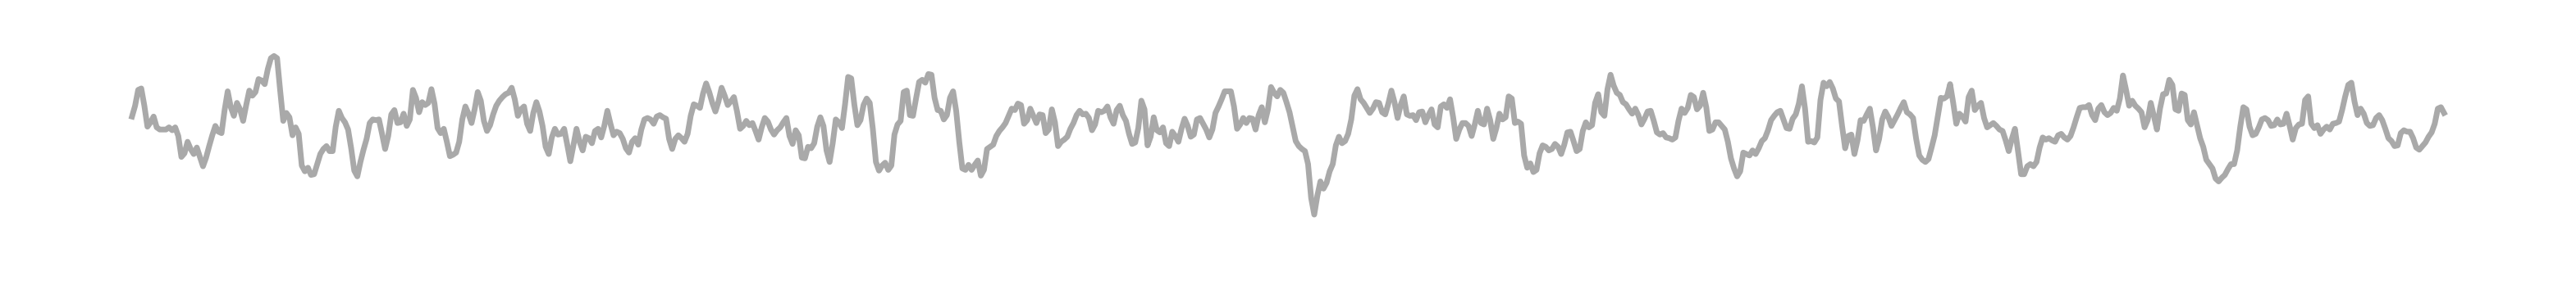

In [465]:
plt.figure(figsize=(20,2))
ch=168
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-200, 150);plt.axis("off")

# plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#D22730', linewidth=5);

# plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#1f77b4', linewidth=5);
# plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#1f77b4', linewidth=5);

plt.savefig("../figures/A/hor_ch168.svg", transparent=True)

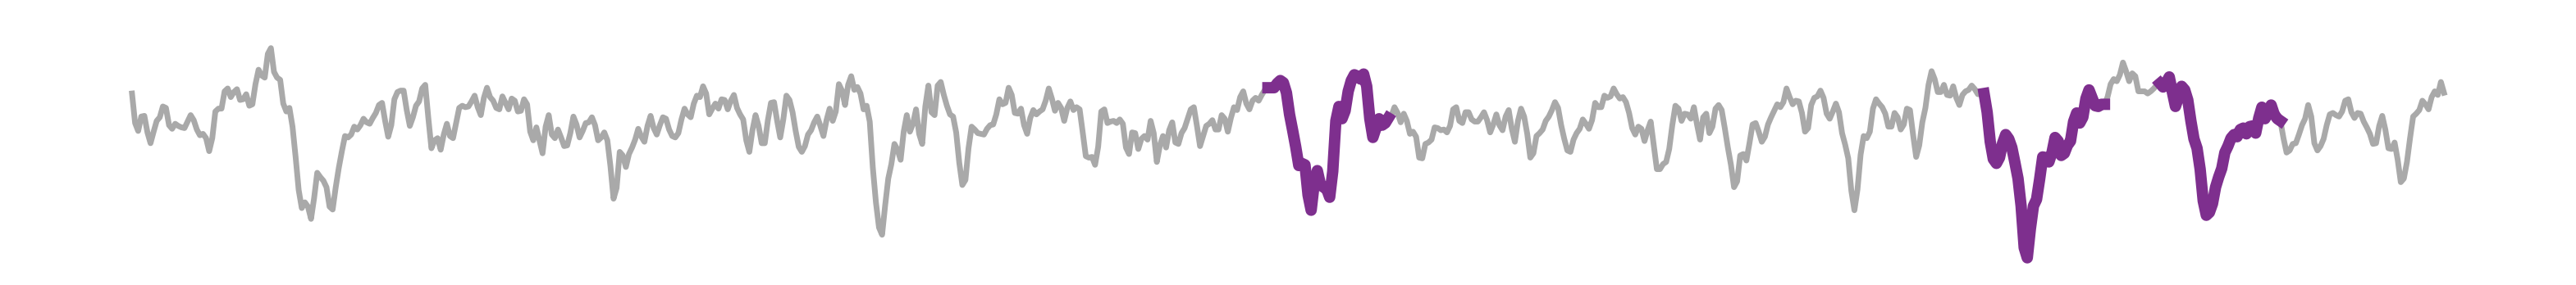

In [475]:
plt.figure(figsize=(20,2))
ch=169
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-200, 150); plt.axis("off")

# plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#D22730', linewidth=5);

plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#7e2f8e', linewidth=5);

plt.savefig("../figures/A/hor_ch169.svg", transparent=True)

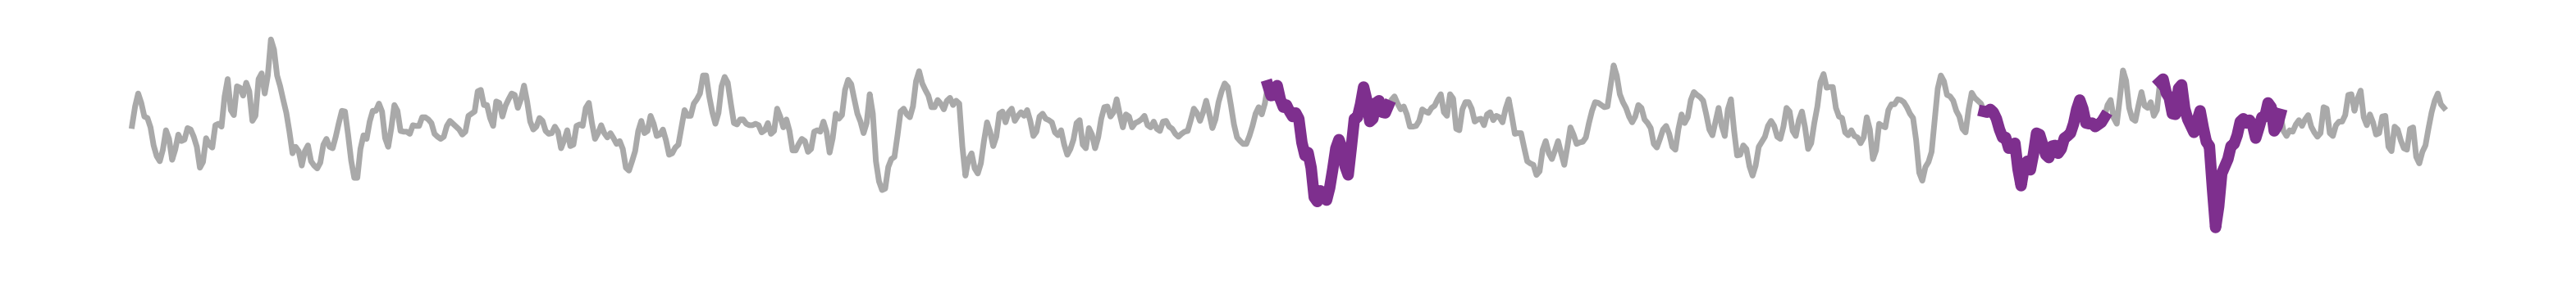

In [476]:
plt.figure(figsize=(20,2))
ch=170
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-200, 150); plt.axis("off")

# plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#D22730', linewidth=5);

plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#7e2f8e', linewidth=5);

plt.savefig("../figures/A/hor_ch170.svg", transparent=True)

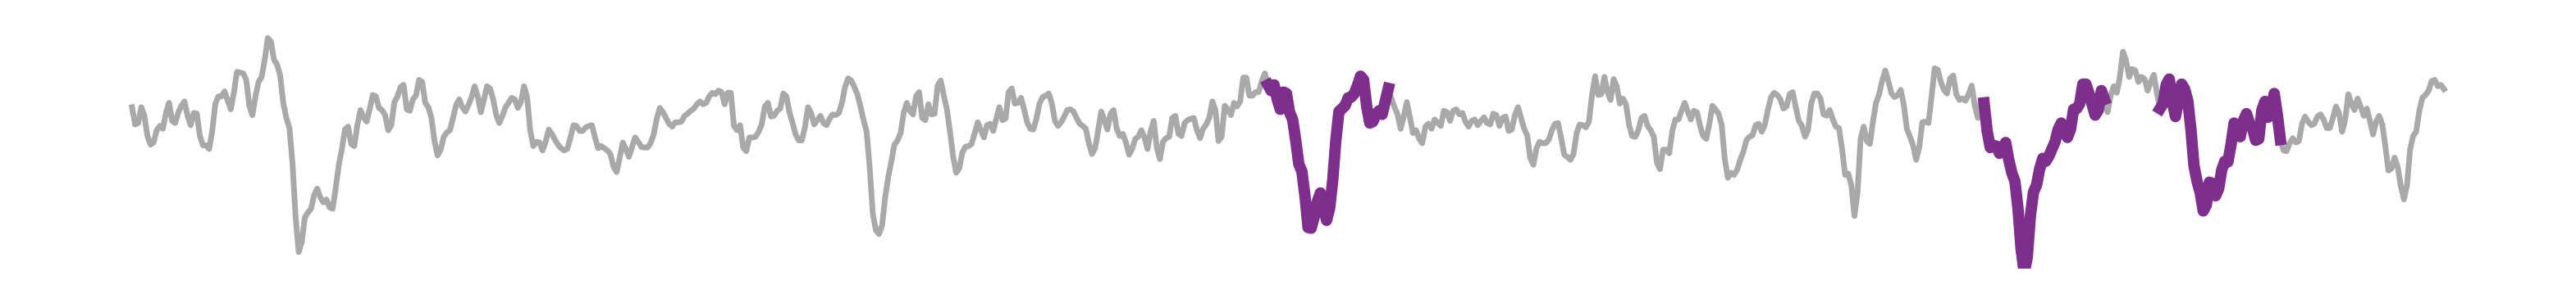

In [477]:
plt.figure(figsize=(20,2))
ch=171
plt.plot(np.arange(end-start),data[start:end,ch], color='darkgrey', linewidth=2.5); plt.ylim(-200, 150);plt.axis("off")

# plt.plot(np.arange(t3-pre-start,t3+post-start), data[t3-pre:t3+post,ch], color='#D22730', linewidth=5);
# plt.plot(np.arange(t4-pre-start,t4+post-start), data[t4-pre:t4+post,ch], color='#D22730', linewidth=5);

plt.plot(np.arange(t5-pre-start,t5+post-start), data[t5-pre:t5+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t6-pre-start,t6+post-start), data[t6-pre:t6+post,ch], color='#7e2f8e', linewidth=5);
plt.plot(np.arange(t7-pre-start,t7+post-start), data[t7-pre:t7+post,ch], color='#7e2f8e', linewidth=5);

plt.savefig("../figures/A/hor_ch171.svg", transparent=True)

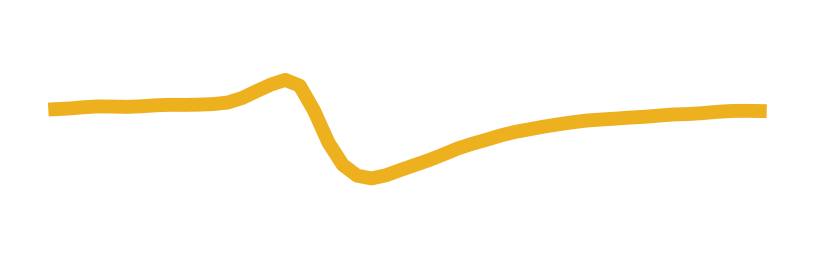

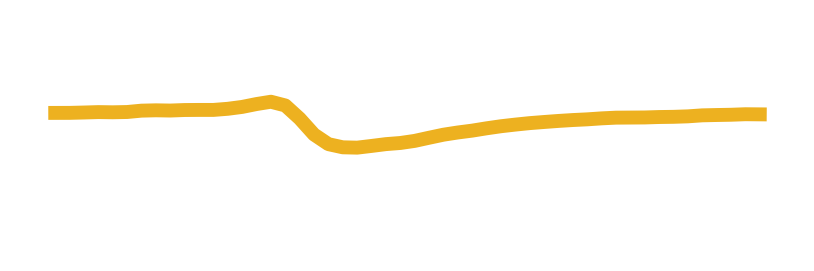

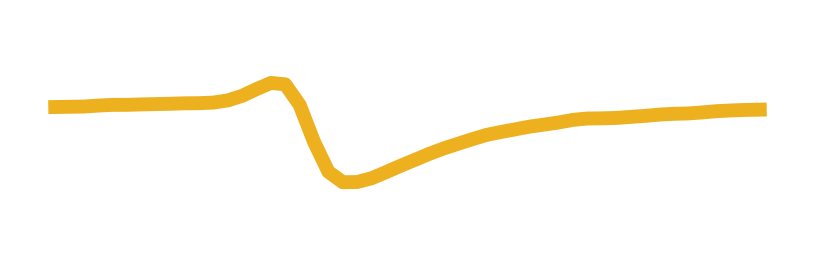

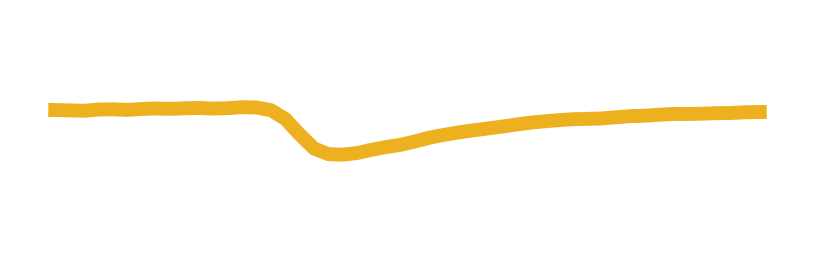

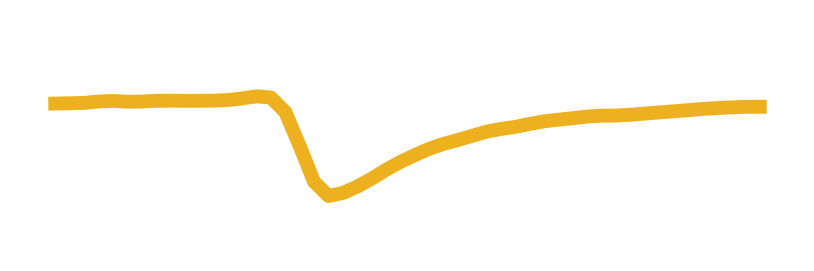

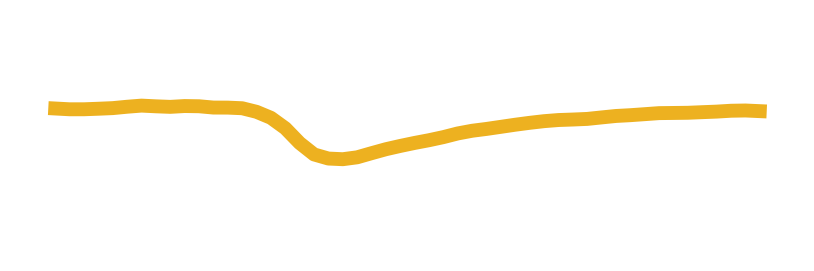

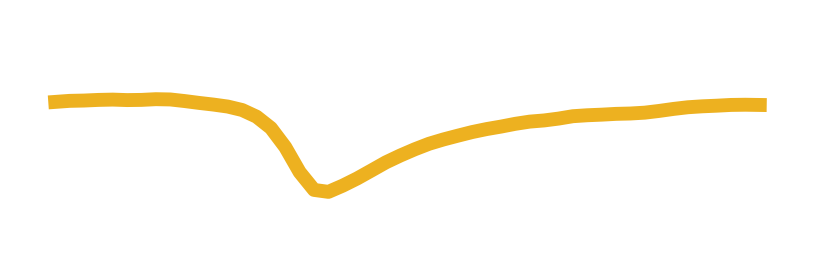

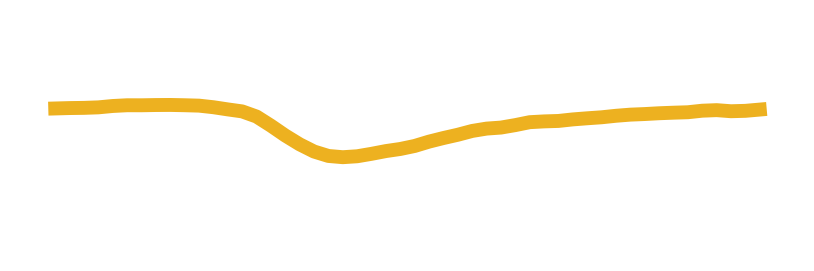

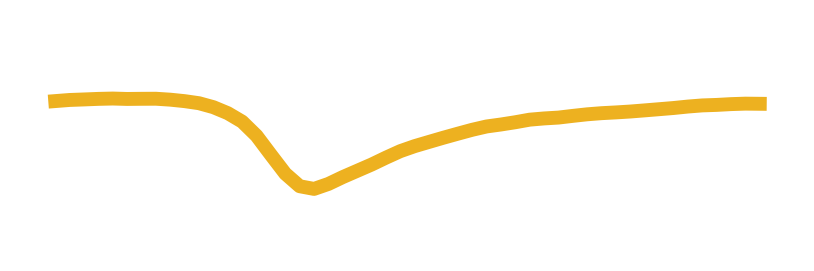

In [526]:
plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 163, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_163.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 164, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_164.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 165, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_165.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 166, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_166.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 167, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_167.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 168, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_168.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 169, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_169.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 170, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_170.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[51, 171, :50], color="#edb120", linewidth=5); plt.axis('off'); plt.ylim([-.20, .15])
plt.savefig("../figures/A/51_mean_171.svg", transparent=True)

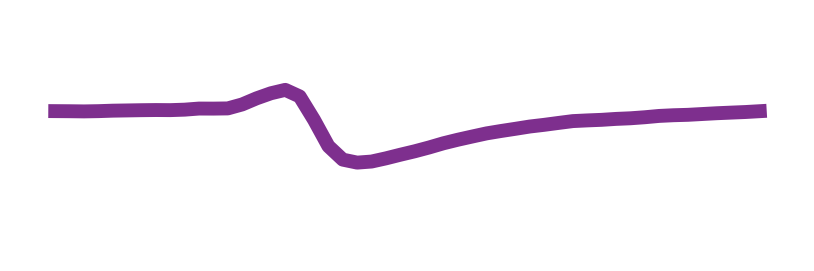

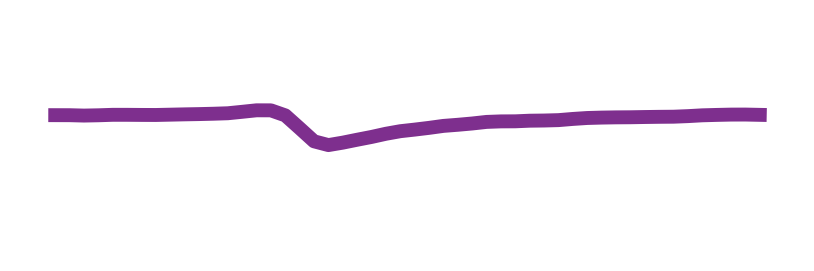

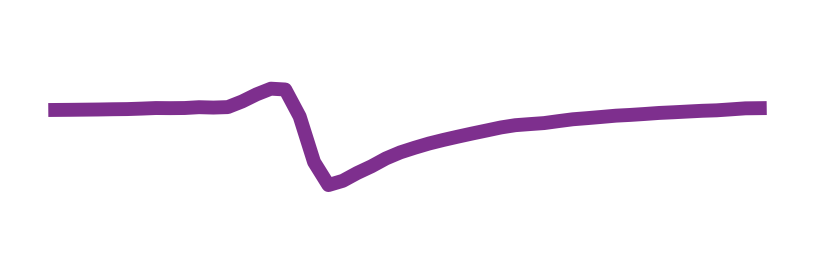

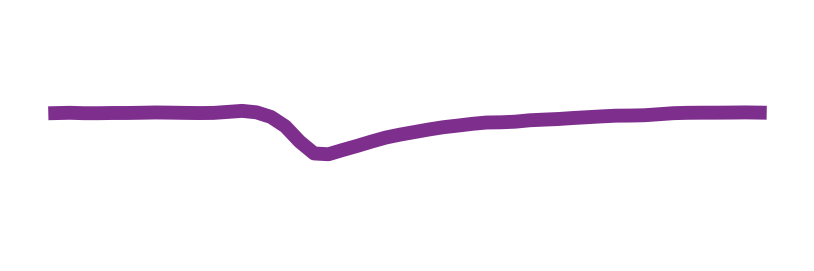

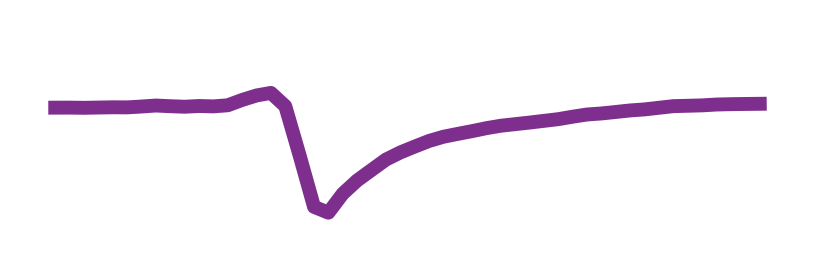

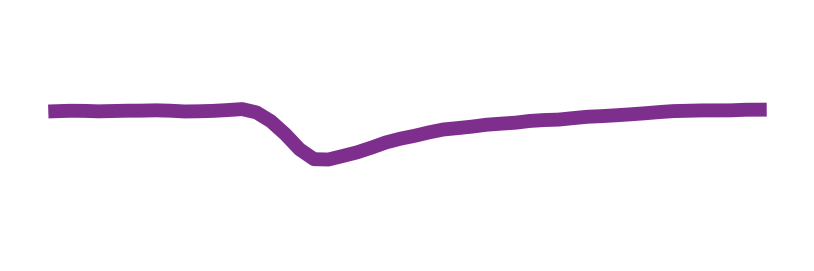

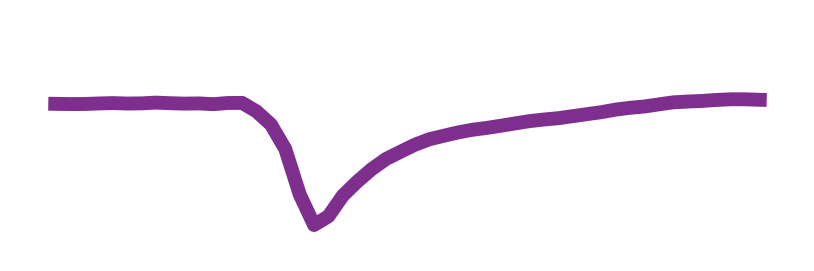

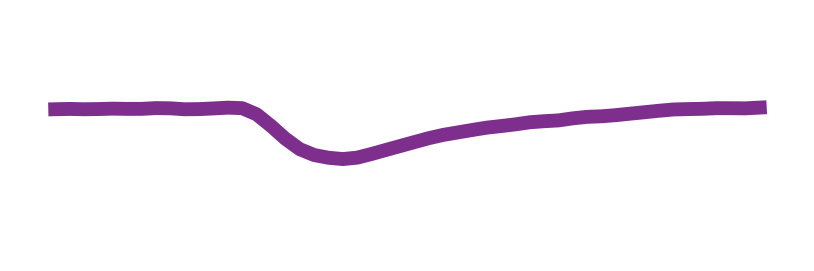

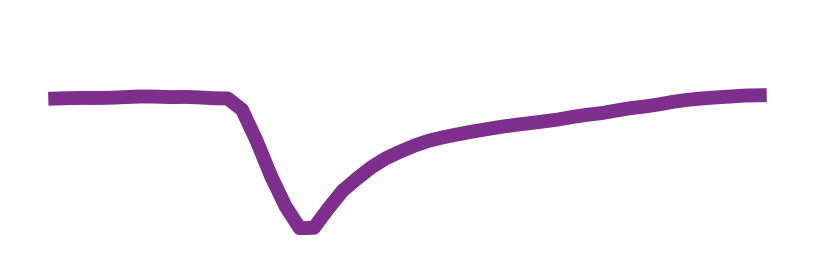

In [528]:
plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 163, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_163.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 164, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_164.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 165, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_165.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 166, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_166.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 167, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_167.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 168, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_168.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 169, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_169.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 170, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_170.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(wf_means_norm[136, 171, :50], color='#7e2f8e', linewidth=5); plt.axis('off'); plt.ylim([-.2, .15])
plt.savefig("../figures/A/136_mean_171.svg", transparent=True)

## Figure B - Cross projection

In [507]:
raw_pre = -50
raw_post = 80

wf_pre = -20
wf_post = 30

lw=5
wf_size = (5,1.5)

In [573]:
times_3 = (bd.find_times(times, clusters, 3)).astype("int")
times_6 = (bd.find_times(times,clusters, 6)).astype("int")

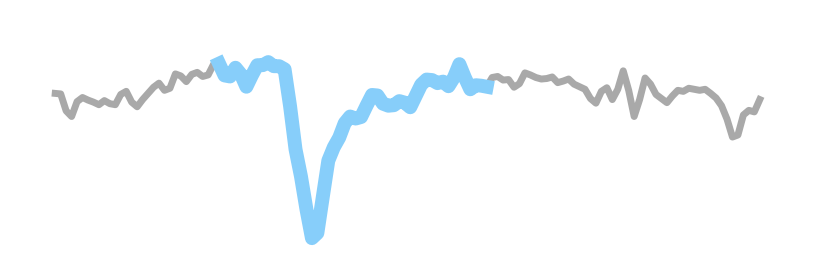

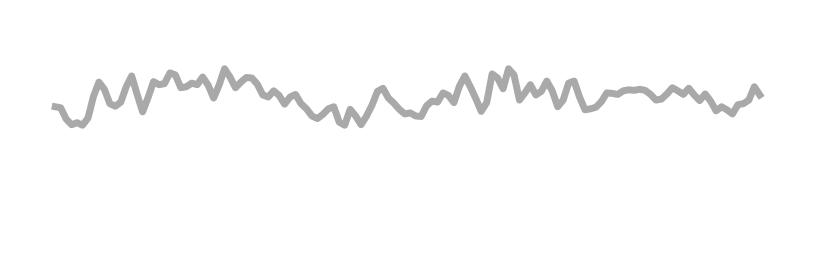

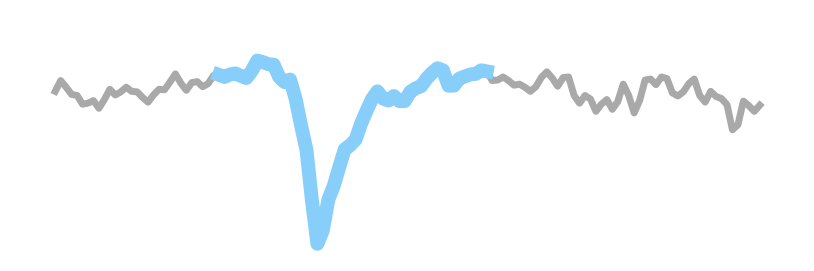

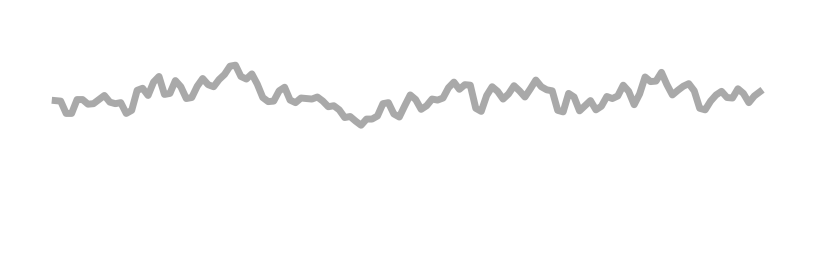

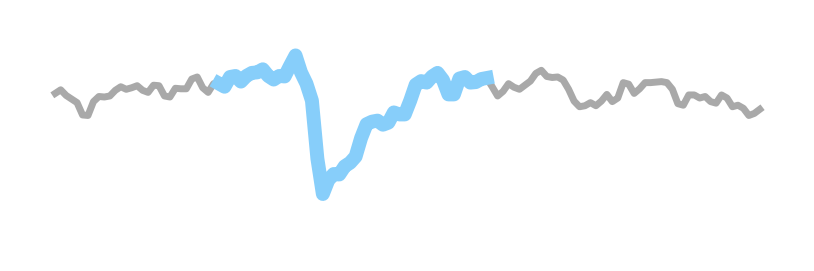

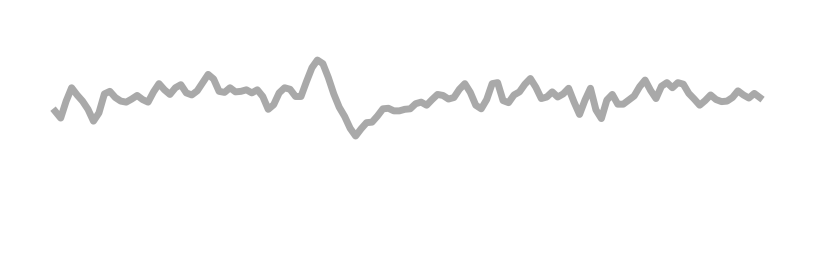

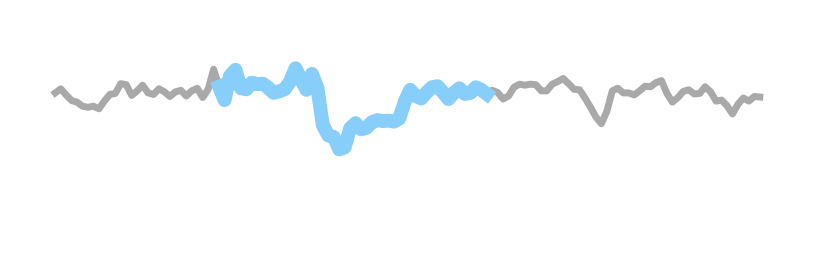

In [508]:
sp_n = 0
col = '#87cefa'

# individual spike figures
plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 0], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 0], color=col, linewidth=5)
plt.savefig("../figures/B/s3_1_0.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 1], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 1], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_1_1.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 2], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 2], color=col, linewidth=5)
plt.savefig("../figures/B/s3_1_2.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 3], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 3], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_1_3.svg", transparent=True)

plt.figure(figsize=wf_size) 
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 4], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 4], color=col, linewidth=5)
plt.savefig("../figures/B/s3_1_4.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 5], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 5], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_1_5.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 6], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 6], color=col, linewidth=5)
plt.savefig("../figures/B/s3_1_6.svg", transparent=True)

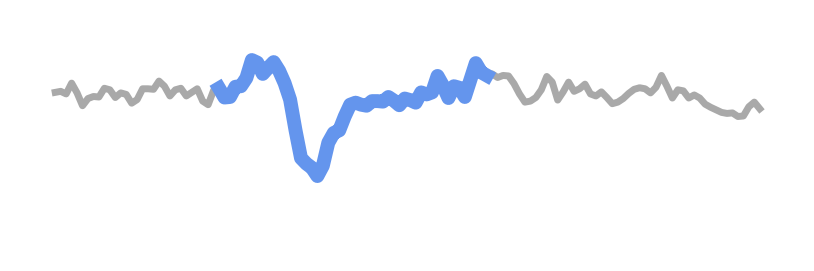

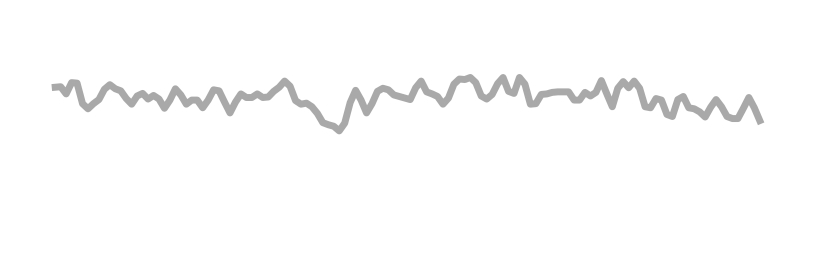

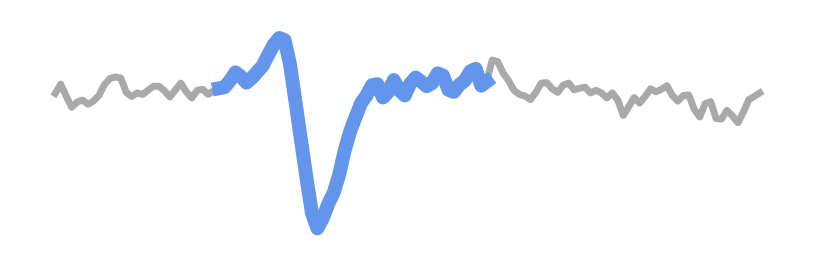

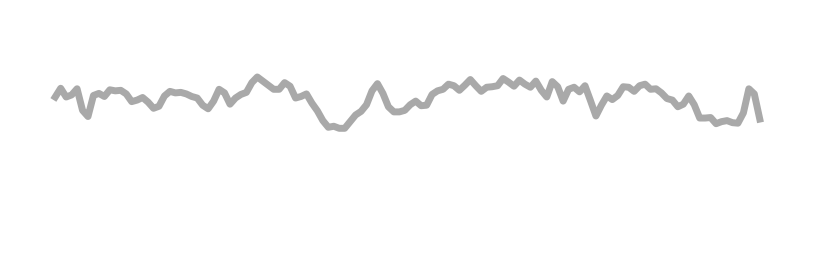

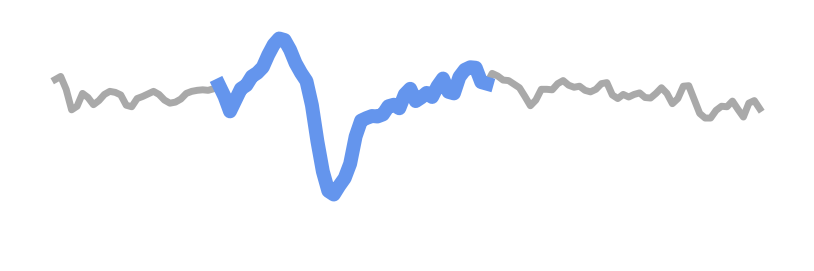

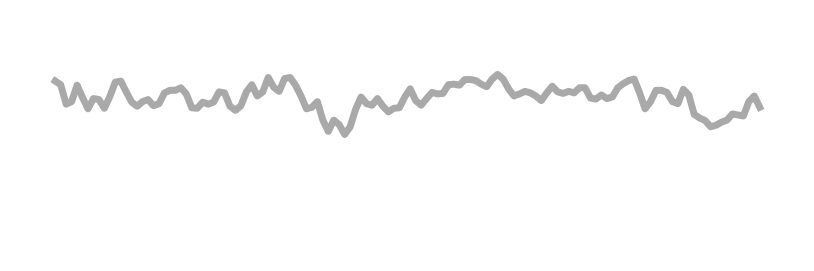

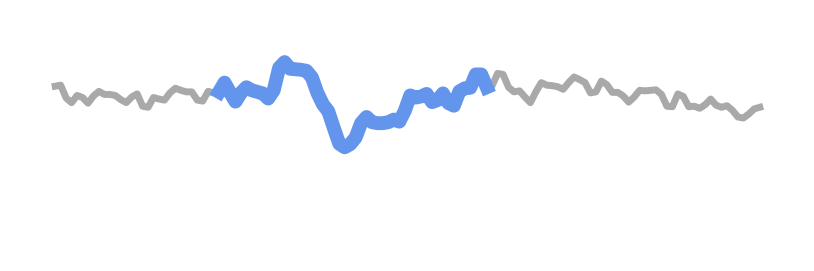

In [509]:
sp_n = 6
col = "#6495ed"

# individual spike figures
plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 0], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 0], color=col, linewidth=5)
plt.savefig("../figures/B/s3_2_0.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 1], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 1], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_2_1.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 2], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 2], color=col, linewidth=5)
plt.savefig("../figures/B/s3_2_2.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 3], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 3], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_2_3.svg", transparent=True)

plt.figure(figsize=wf_size) 
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 4], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 4], color=col, linewidth=5)
plt.savefig("../figures/B/s3_2_4.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 5], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 5], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_2_5.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 6], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 6], color=col, linewidth=5)
plt.savefig("../figures/B/s3_2_6.svg", transparent=True)

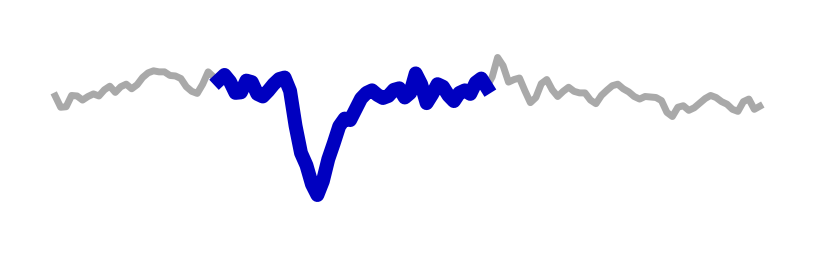

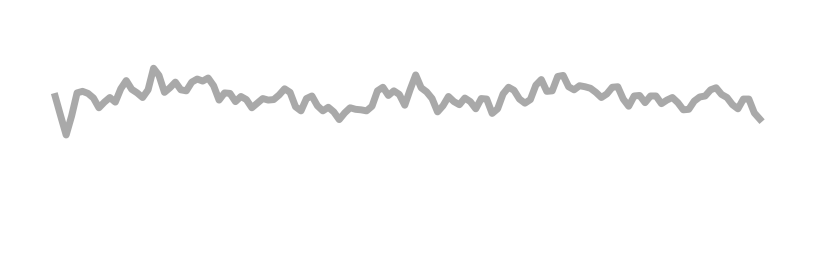

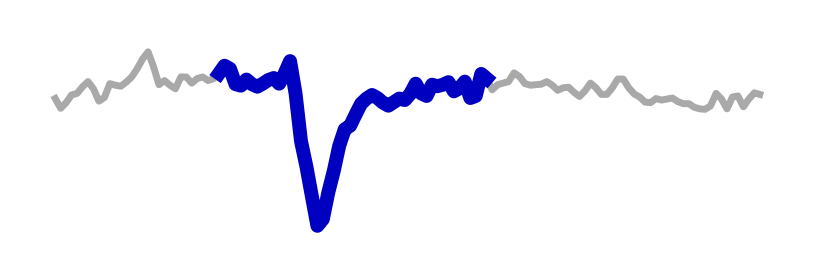

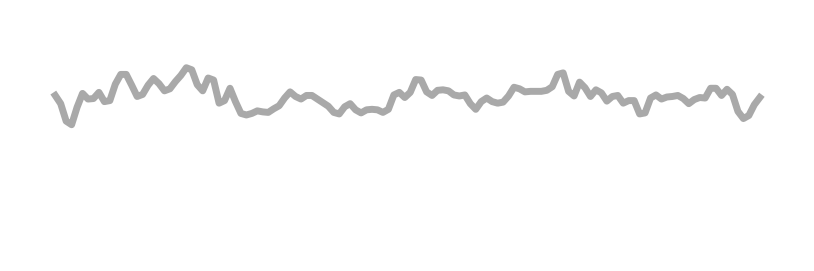

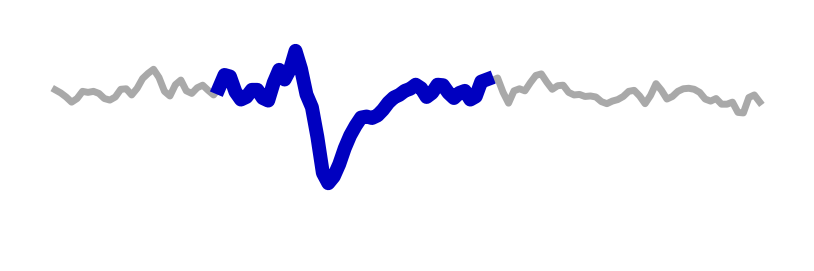

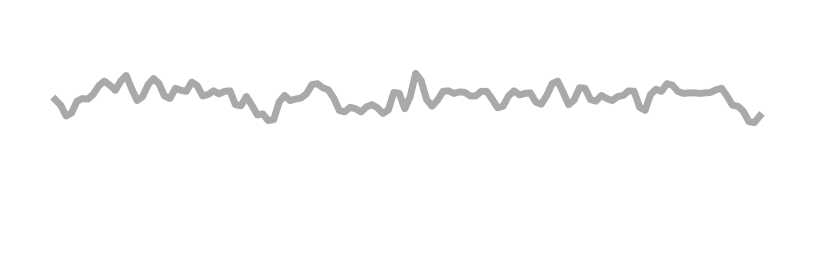

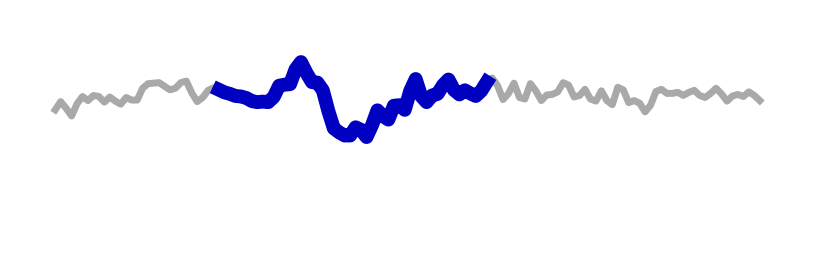

In [510]:
sp_n = 342
col = "#0000C0"

# individual spike figures
plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 0], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 0], color=col, linewidth=5)
plt.savefig("../figures/B/s3_3_0.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 1], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 1], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_3_1.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 2], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 2], color=col, linewidth=5)
plt.savefig("../figures/B/s3_3_2.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 3], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 3], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_3_3.svg", transparent=True)

plt.figure(figsize=wf_size) 
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 4], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 4], color=col, linewidth=5)
plt.savefig("../figures/B/s3_3_4.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 5], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 5], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s3_3_5.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_3[sp_n]+raw_pre:times_3[sp_n]+raw_post, 6], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[sp_n]+wf_pre:times_3[sp_n]+wf_post, 6], color=col, linewidth=5)
plt.savefig("../figures/B/s3_3_6.svg", transparent=True)

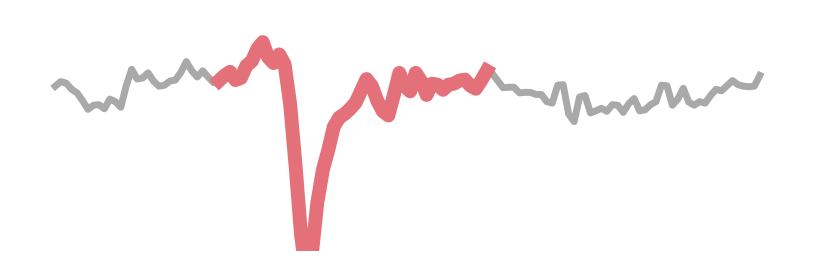

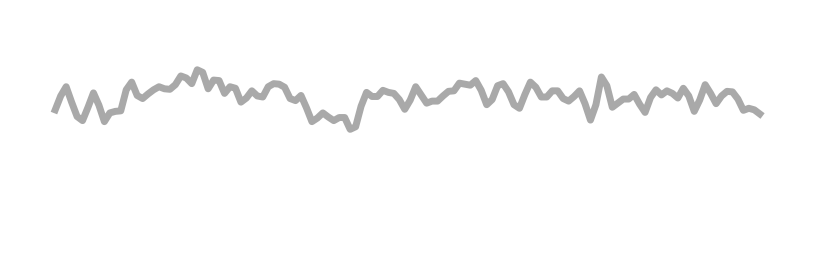

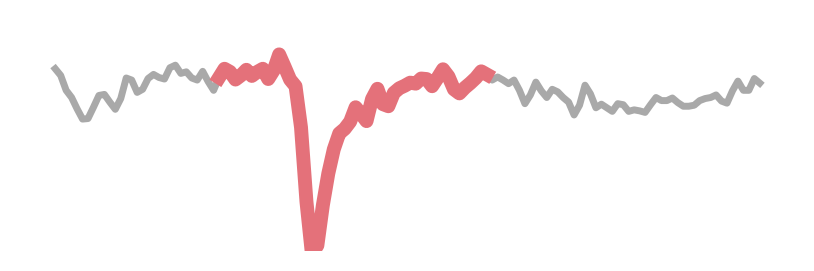

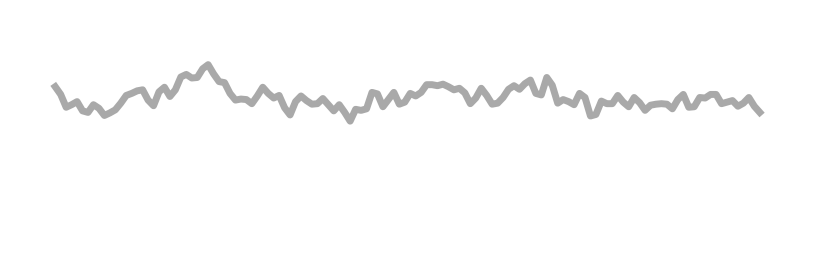

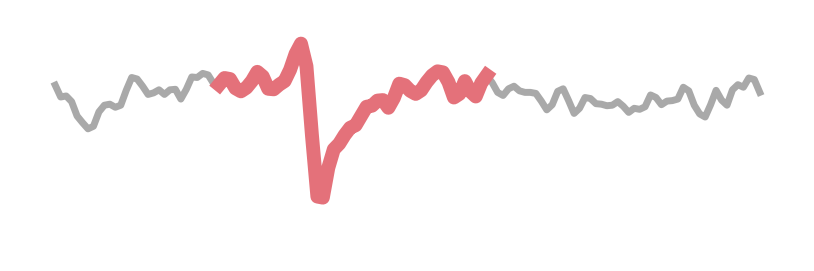

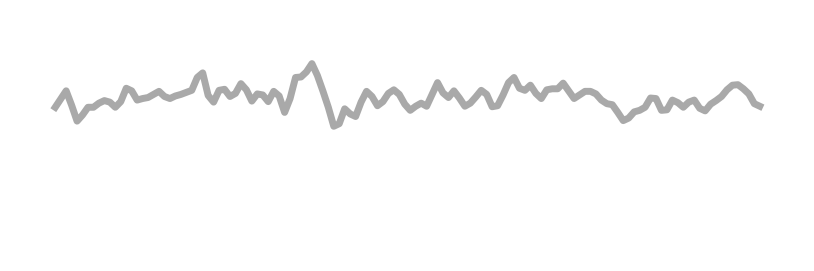

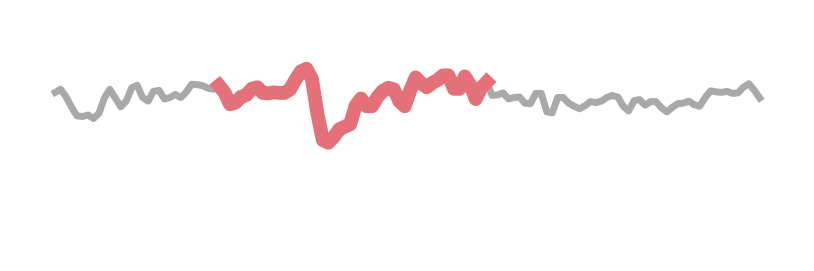

In [514]:
sp_n = 0
col = "#e4717a"

# individual spike figures
plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 0], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 0], color=col, linewidth=5)
plt.savefig("../figures/B/s6_1_0.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 1], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 1], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_1_1.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 2], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 2], color=col, linewidth=5)
plt.savefig("../figures/B/s6_1_2.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 3], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 3], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_1_3.svg", transparent=True)

plt.figure(figsize=wf_size) 
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 4], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 4], color=col, linewidth=5)
plt.savefig("../figures/B/s6_1_4.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 5], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 5], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_1_5.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 6], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 6], color=col, linewidth=5)
plt.savefig("../figures/B/s6_1_6.svg", transparent=True)

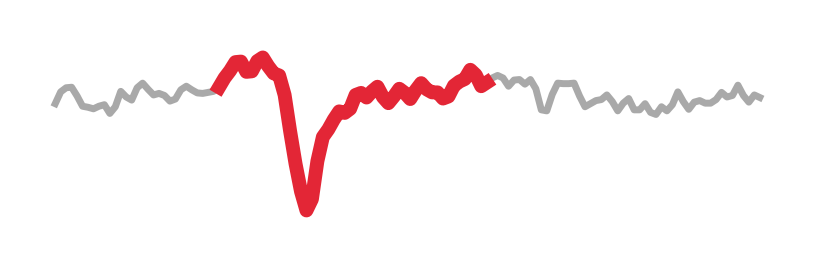

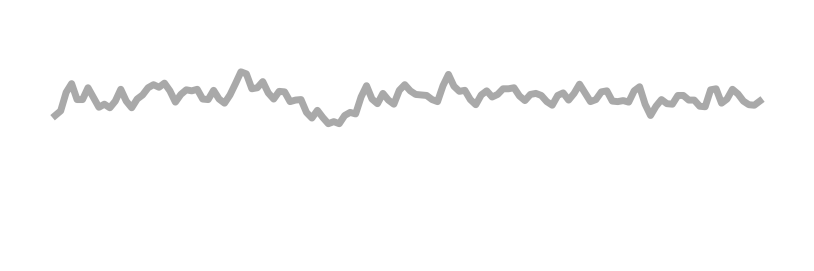

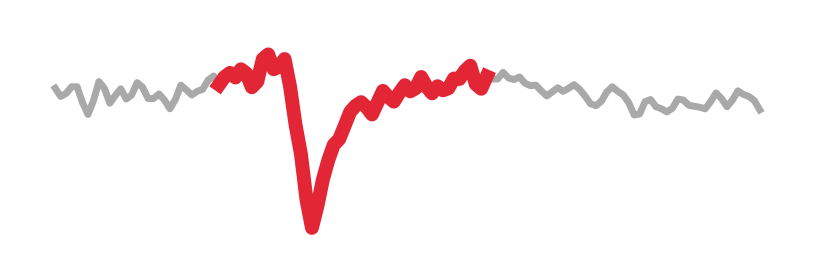

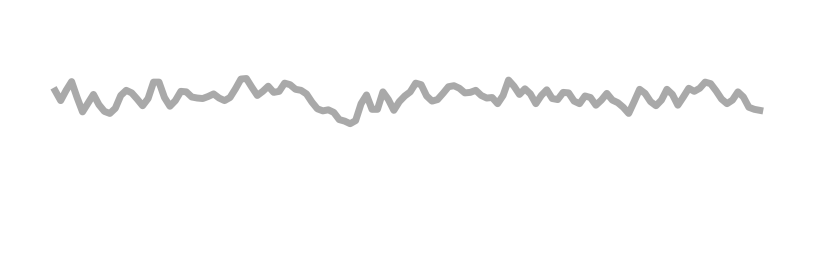

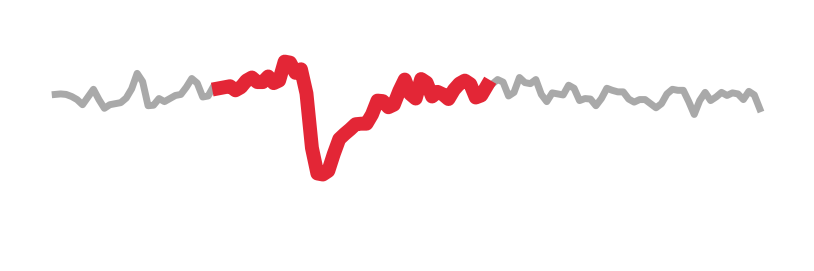

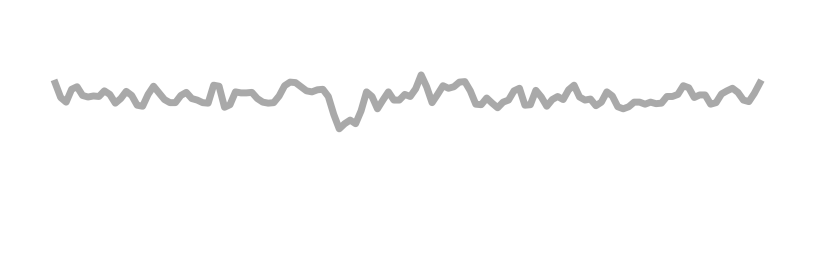

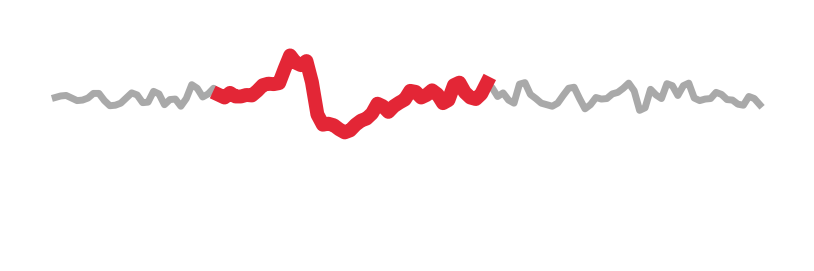

In [515]:
sp_n = 121
col = "#e32636"

# individual spike figures
plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 0], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 0], color=col, linewidth=5)
plt.savefig("../figures/B/s6_2_0.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 1], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 1], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_2_1.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 2], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 2], color=col, linewidth=5)
plt.savefig("../figures/B/s6_2_2.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 3], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 3], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_2_3.svg", transparent=True)

plt.figure(figsize=wf_size) 
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 4], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 4], color=col, linewidth=5)
plt.savefig("../figures/B/s6_2_4.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 5], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 5], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_2_5.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 6], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 6], color=col, linewidth=5)
plt.savefig("../figures/B/s6_2_6.svg", transparent=True)

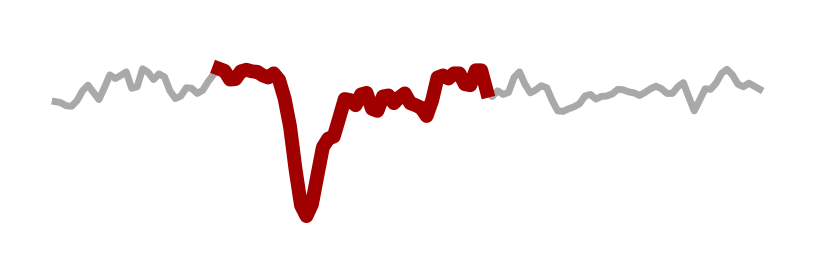

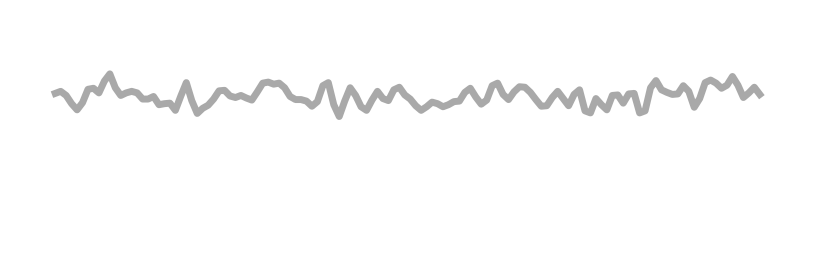

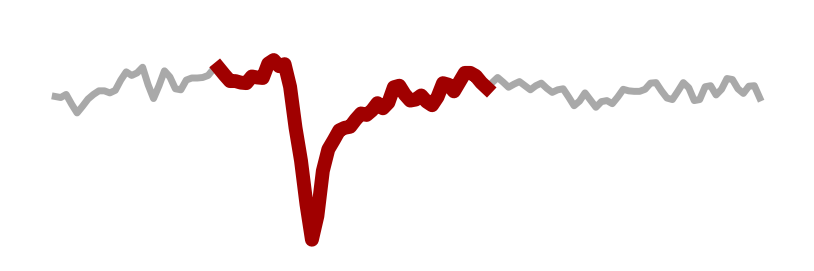

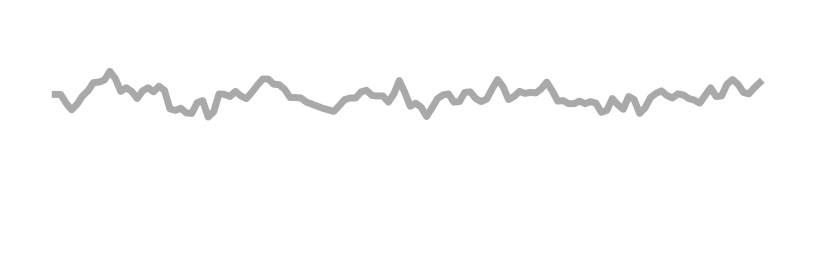

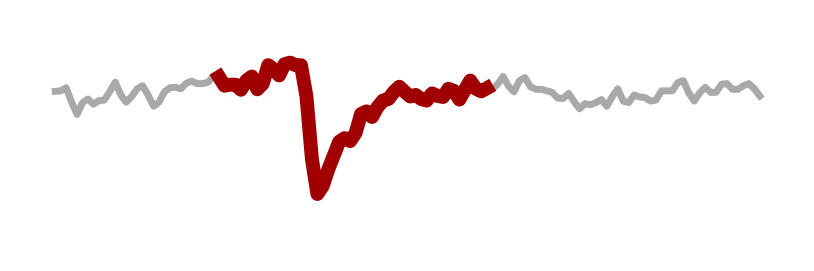

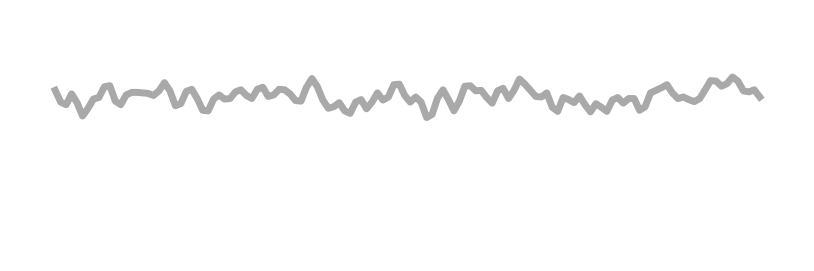

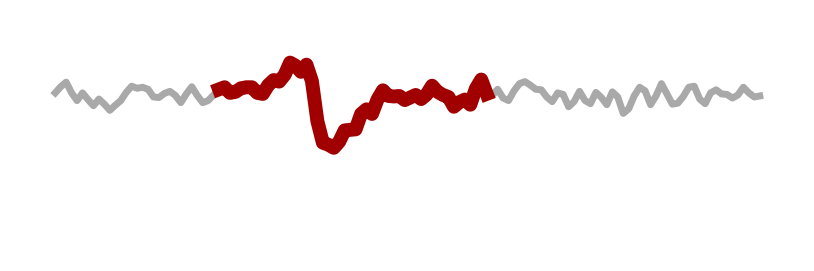

In [516]:
sp_n = 152
col = "#a00000"

# individual spike figures
plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 0], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 0], color=col, linewidth=5)
plt.savefig("../figures/B/s6_3_0.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 1], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 1], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_3_1.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 2], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 2], color=col, linewidth=5)
plt.savefig("../figures/B/s6_3_2.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 3], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 3], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_3_3.svg", transparent=True)

plt.figure(figsize=wf_size) 
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 4], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 4], color=col, linewidth=5)
plt.savefig("../figures/B/s6_3_4.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 5], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
# plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_3[0]+wf_pre:times_3[0]+wf_post, 5], color='#87cefa', linewidth=5)
plt.savefig("../figures/B/s6_3_5.svg", transparent=True)

plt.figure(figsize=wf_size)
plt.plot(np.arange(raw_post-raw_pre),data[times_6[sp_n]+raw_pre:times_6[sp_n]+raw_post, 6], color='darkgrey', linewidth=2.5); plt.axis('off'); plt.ylim([-300, 150])
plt.plot(np.arange((wf_pre-raw_pre), wf_post-wf_pre+(wf_pre-raw_pre)),data[times_6[sp_n]+wf_pre:times_6[sp_n]+wf_post, 6], color=col, linewidth=5)
plt.savefig("../figures/B/s6_3_6.svg", transparent=True)

In [560]:
mean3 = bd.extract_spikes(data, times, clusters, 3, pre_samples=50, post_samples=80).mean(axis=0)
mean6 = bd.extract_spikes(data, times, clusters, 6, pre_samples=50, post_samples=80).mean(axis=0)

mean3 /= np.linalg.norm(mean3)
mean6 /= np.linalg.norm(mean6)

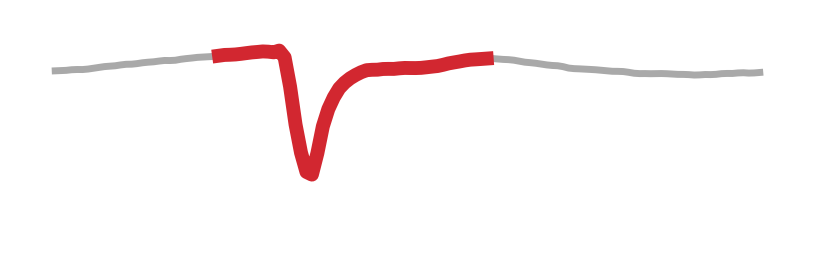

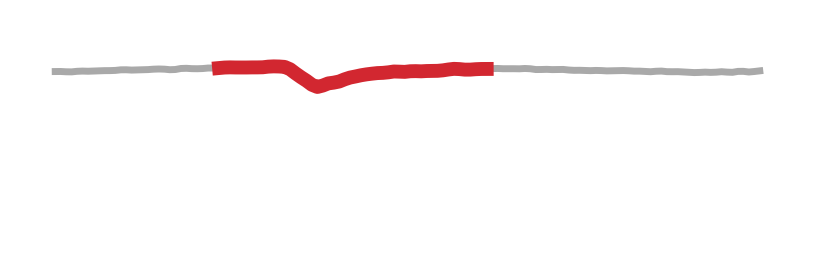

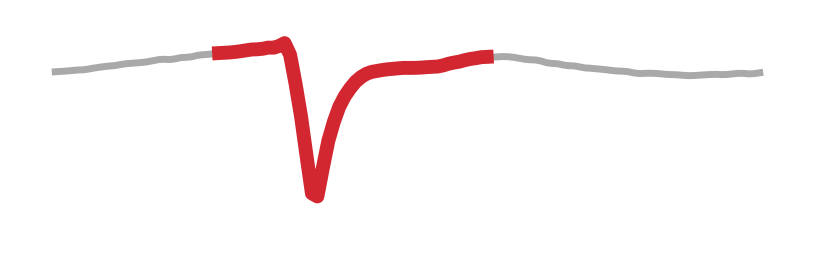

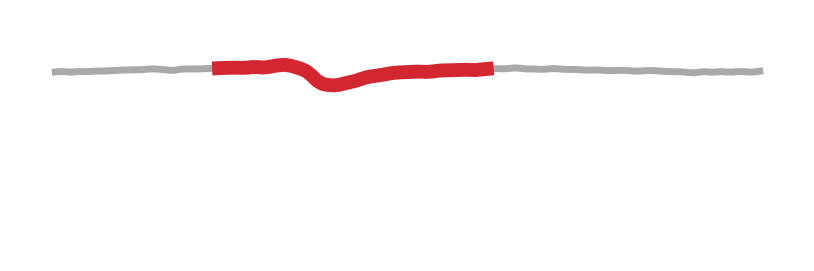

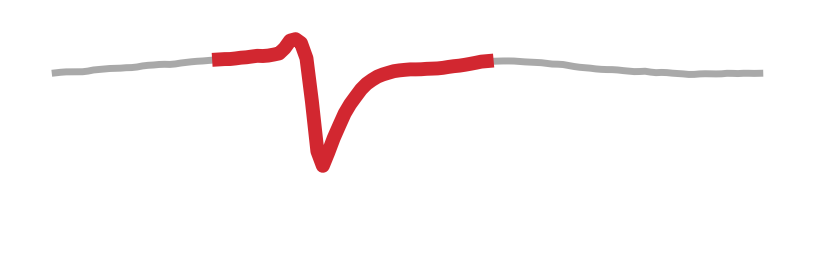

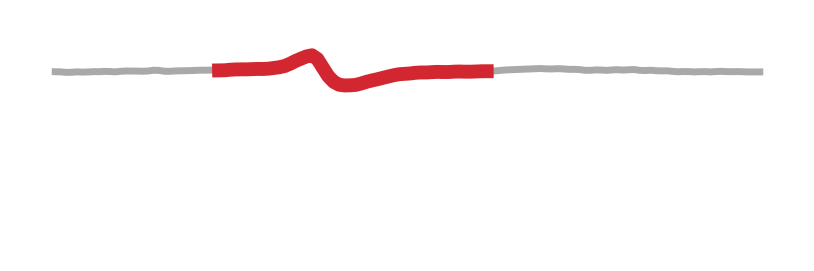

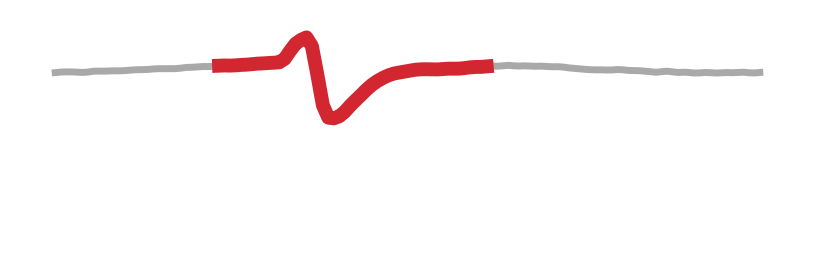

In [567]:
col="#D22730"
cl = 6
wf_end = 50

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean6[0], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean6[0,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/6_mean_0.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean6[1], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean6[1,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/6_mean_1.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean6[2], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean6[2,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/6_mean_2.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean6[3], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean6[3,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/6_mean_3.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean6[4], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean6[4,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/6_mean_4.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean6[5], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean6[5,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/6_mean_5.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean6[6], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean6[6,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/6_mean_6.svg", transparent=True)

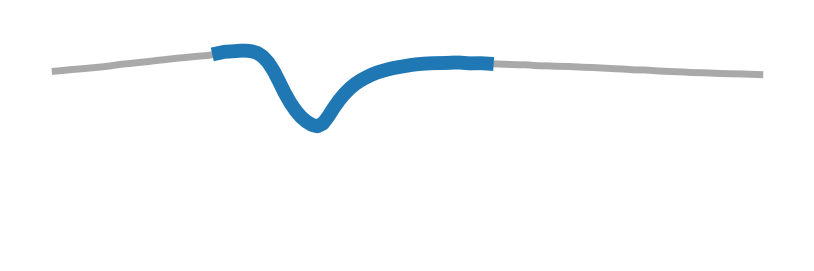

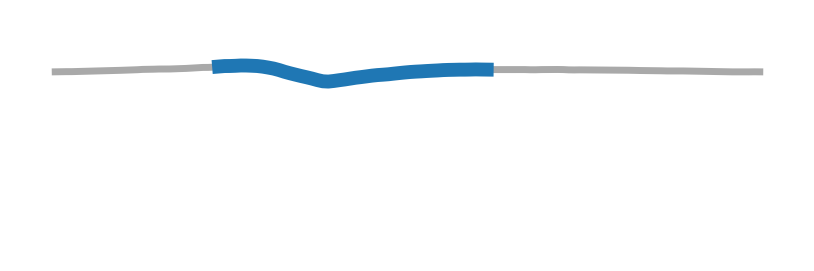

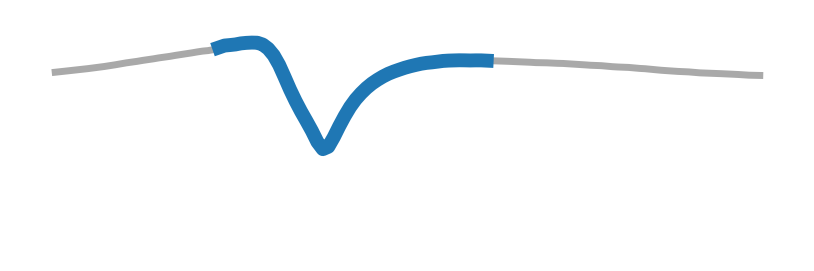

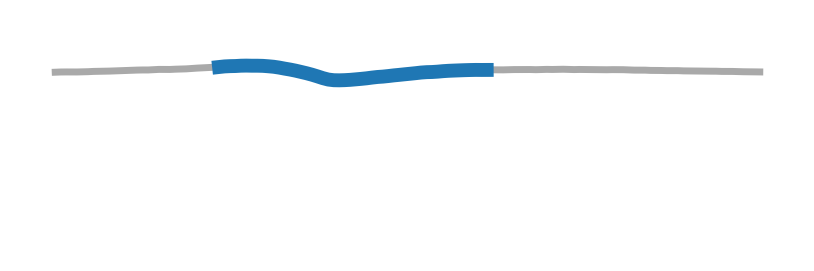

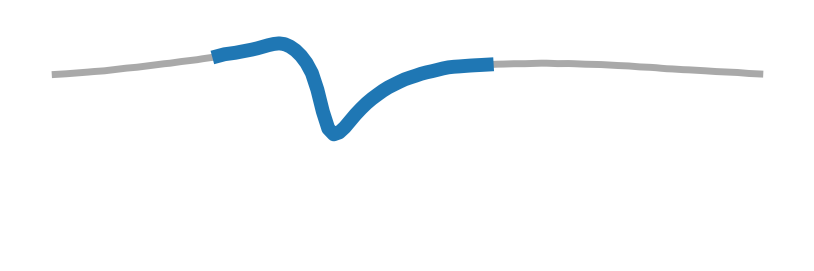

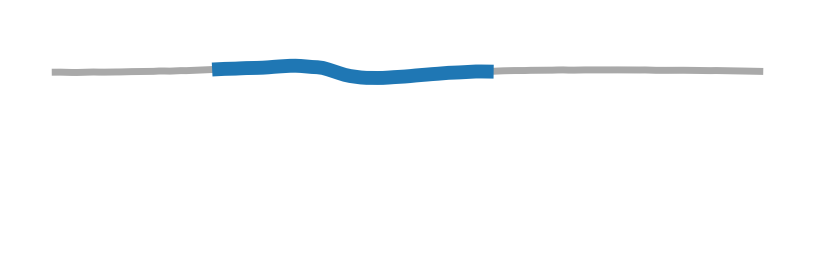

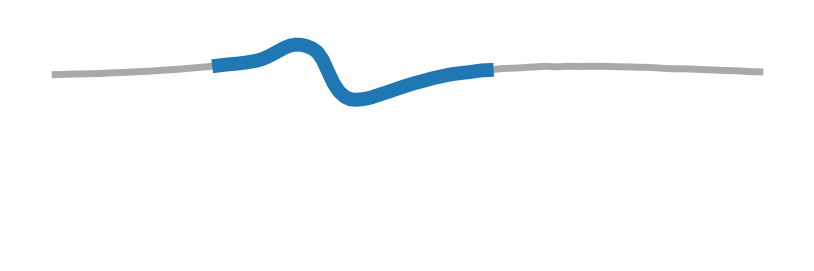

In [569]:
col='#1f77b4'
cl = 3
wf_end = 50

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean3[0], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean3[0,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/3_mean_0.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean3[1], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean3[1,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/3_mean_1.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean3[2], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean3[2,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/3_mean_2.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean3[3], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean3[3,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/3_mean_3.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean3[4], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean3[4,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/3_mean_4.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean3[5], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean3[5,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/3_mean_5.svg", transparent=True)

plt.figure(figsize=(5,1.5))
plt.plot(np.arange(mean6.shape[1]), mean3[6], color='darkgrey', linewidth=2.5)
plt.plot(np.arange(30, 80), mean3[6,30:80], color=col, linewidth=5); plt.axis('off'); plt.ylim([-.35, .1])
plt.savefig("../figures/B/3_mean_6.svg", transparent=True)

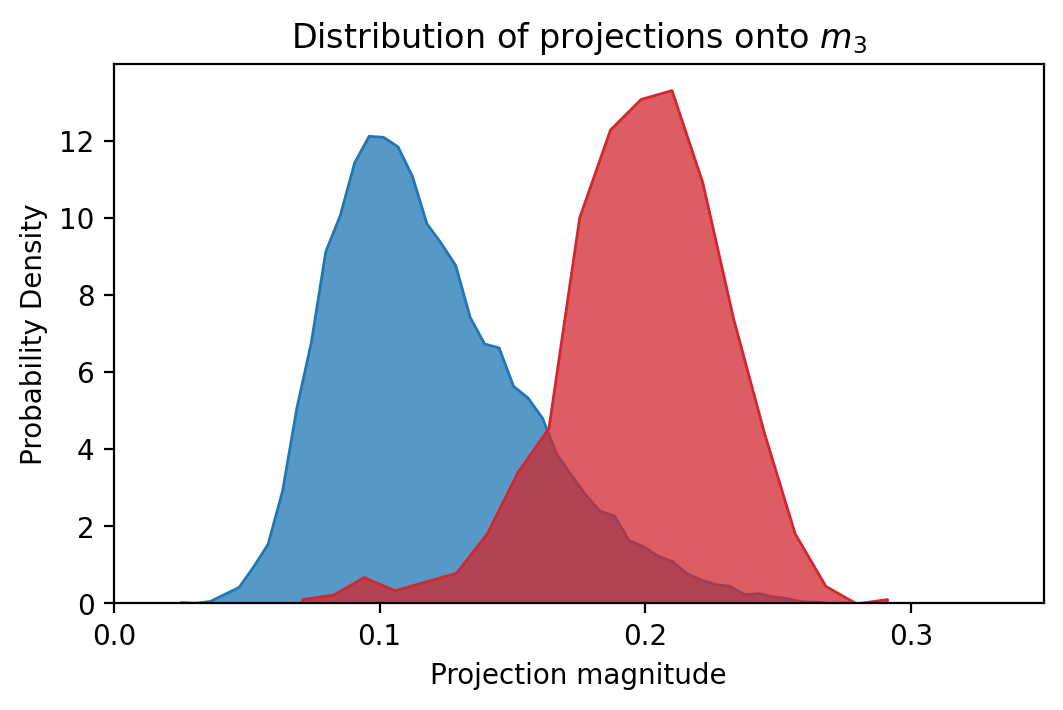

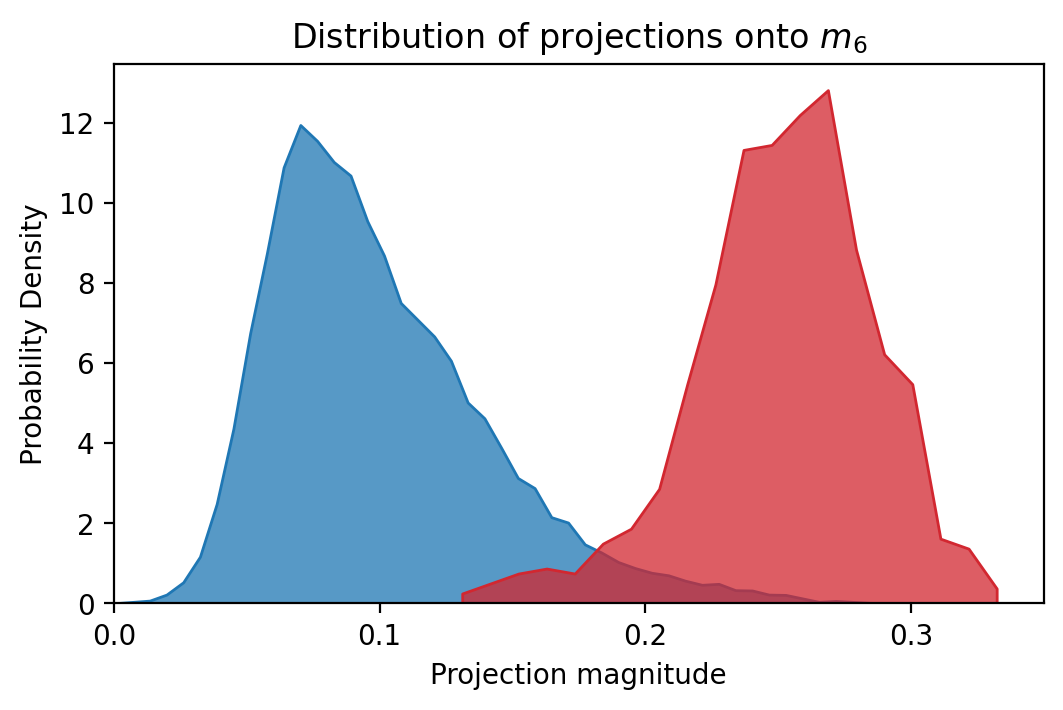

In [235]:
# distribution figures
plt.figure(figsize=(6,3.5))
sns.histplot(proj_1on1, stat='density',element='poly',  bins=50, label="cluster 3 spikes");
sns.histplot(proj_2on1, stat='density', element='poly', color='#D22730', bins=20, label="cluster 6 spikes");
plt.xlim([0, .35]); plt.xticks(np.arange(0, .4, .1));
plt.ylabel("Probability Density"); plt.xlabel("Projection magnitude")
plt.title(r'Distribution of projections onto $m_3$');
plt.savefig("../figures/B/projon1.svg", transparent=True)

plt.figure(figsize=(6,3.5))
sns.histplot(proj_1on2, stat='density',element='poly', bins=50, label="cluster 3 spikes");
sns.histplot(proj_2on2, stat='density', element='poly', color='#D22730', bins=20, label="cluster 6 spikes");
plt.xlim([0, .35]); plt.xticks(np.arange(0, .4, .1));
plt.ylabel("Probability Density"); plt.xlabel("Projection magnitude");
plt.title(r'Distribution of projections onto $m_6$'); 
plt.savefig("../figures/B/projon2.svg", transparent=True)

## Figure C - Cross-correlation

In [5]:
times_3 = bd.find_times(times, clusters, 36)/30000
times_6 = bd.find_times(times,clusters, 129)/30000

times_3 = times_3[(times_3>1715) & (times_3<1720)] - 1715
times_6 = times_6[(times_6>1715) & (times_6<1720)] - 1715

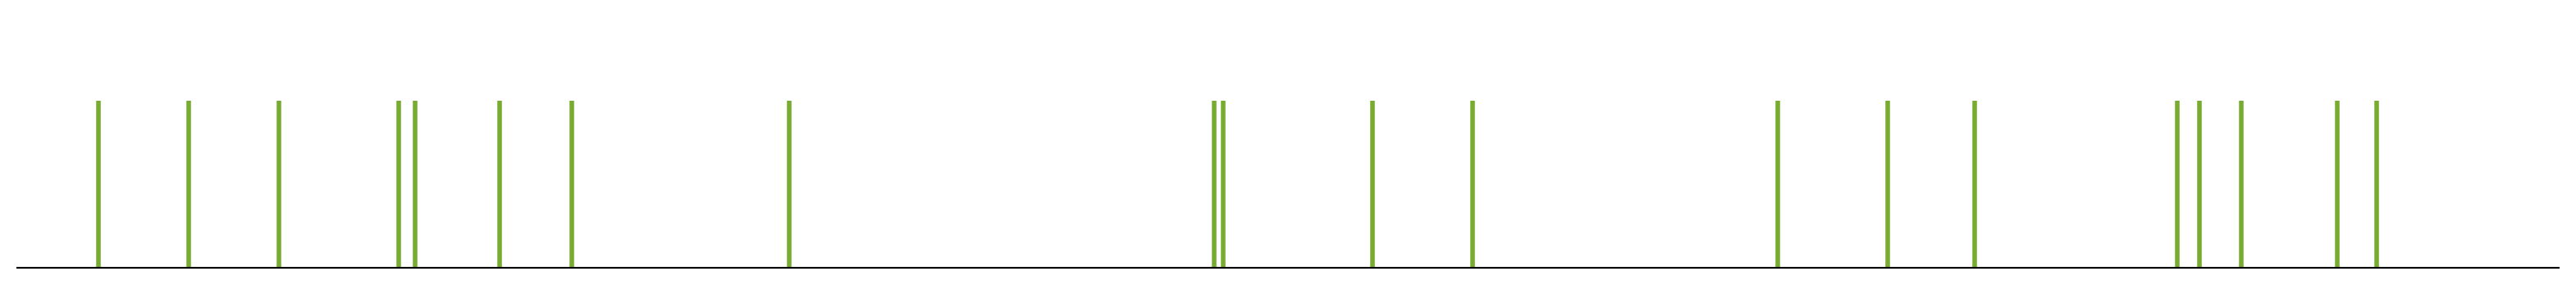

In [6]:
# original spike trains
plt.figure(figsize=(20,2))
marker, stem, base = plt.stem(times_3, np.ones(20), markerfmt=' '); plt.axis('off'); plt.ylim([0,1.5]); plt.xlim([0, 5])
plt.setp(stem, 'linewidth', 2); plt.setp(stem, 'color', '#77ac30')
plt.setp(base, 'color', 'k');
base.set_xdata([0,1])
base.set_transform(plt.gca().get_yaxis_transform())

plt.savefig("../figures/C/st_36_orig.svg", transparent=True)

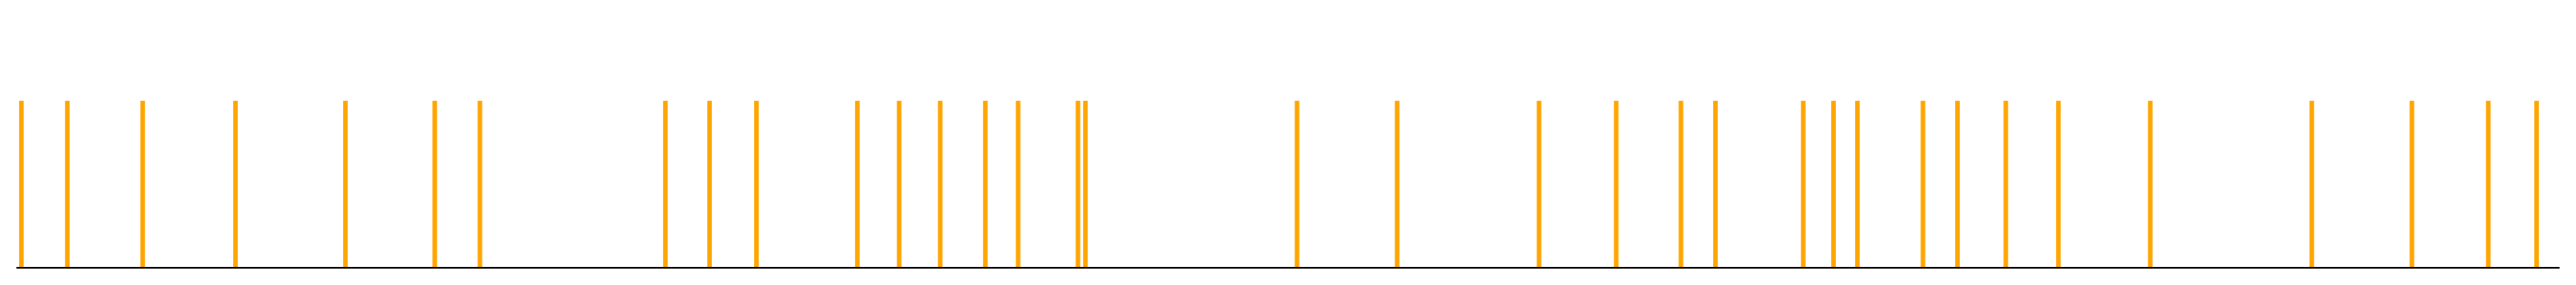

In [7]:
plt.figure(figsize=(20,2))
marker, stem, base = plt.stem(times_6, np.ones(35), markerfmt=' '); plt.axis('off'); plt.ylim([0,1.5]); plt.xlim([0,5])
plt.setp(stem, 'linewidth', 2); plt.setp(stem, 'color', '#ffa500')
plt.setp(base, 'color', 'k');
base.set_xdata([0,1])
base.set_transform(plt.gca().get_yaxis_transform())
plt.savefig("../figures/C/st_129_orig.svg", transparent=True)

In [8]:
# shuffled spike trains
counts_36, counts_129 = bd.bin_spike_trains(times_3, times_6, 1)
shfl_36, shfl_129 = bd.shuffle_spike_trains(counts_36, counts_129, 1)

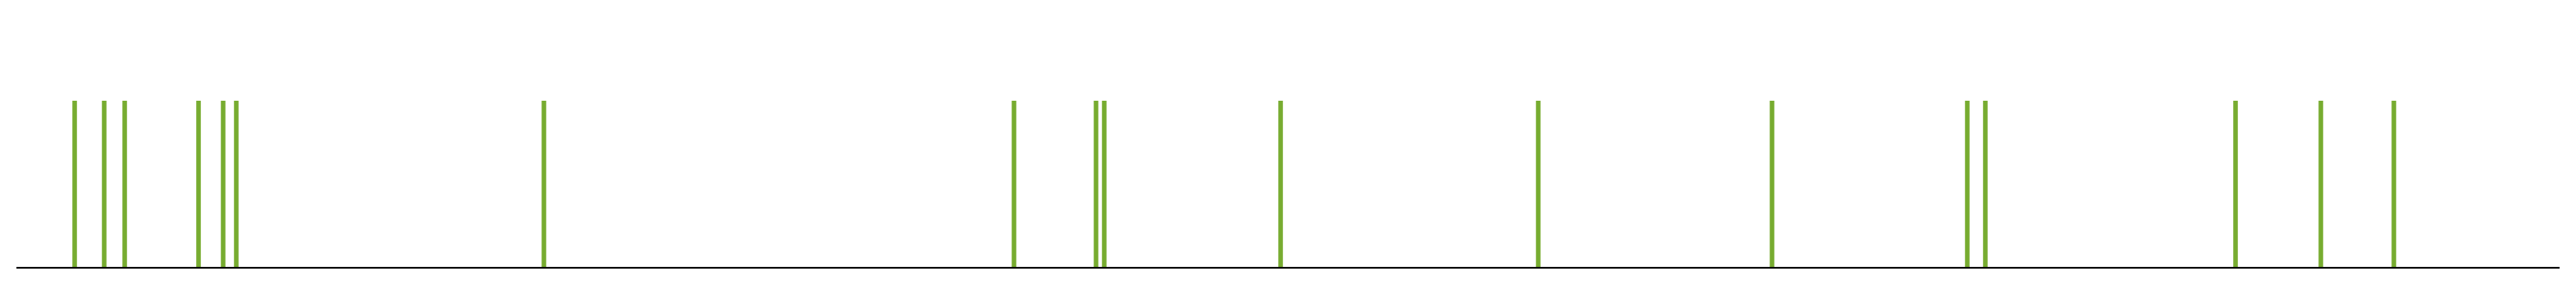

In [9]:
plt.figure(figsize=(20,2))
marker, stem, base = plt.stem(shfl_36, np.ones(20), markerfmt=' '); plt.axis('off'); plt.ylim([0,1.5]); plt.xlim([0, 5])
plt.setp(stem, 'linewidth', 2); plt.setp(stem, 'color', '#77ac30')
plt.setp(base, 'color', 'k');
base.set_xdata([0,1])
base.set_transform(plt.gca().get_yaxis_transform())

plt.savefig("../figures/C/st_36_shfl.svg", transparent=True)

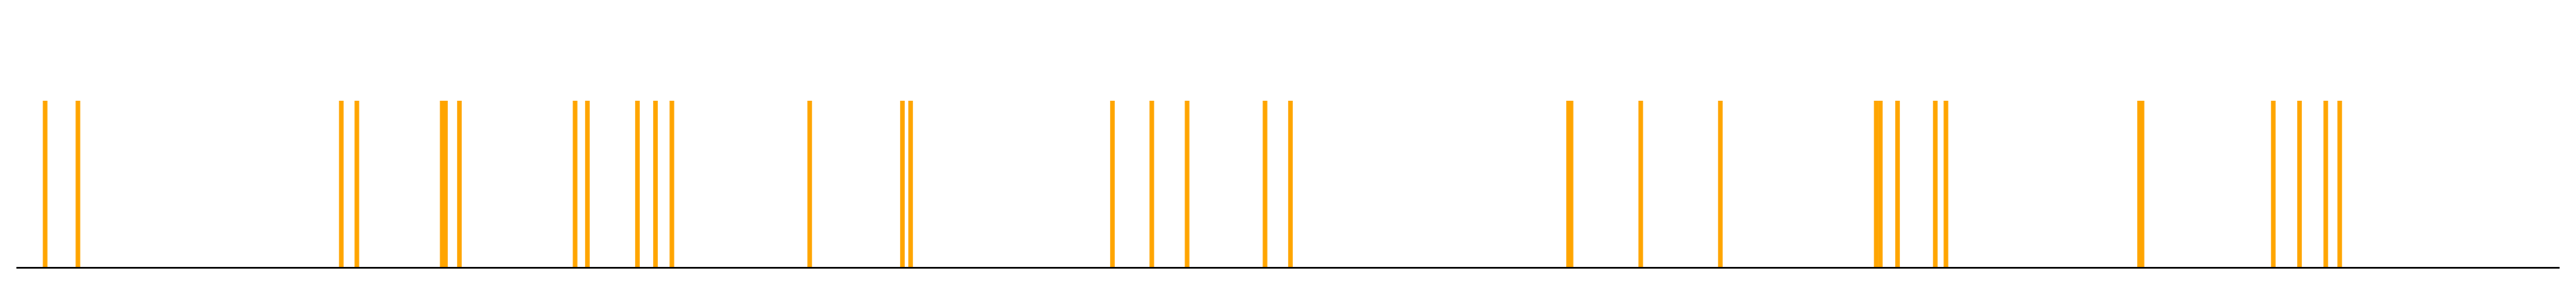

In [10]:
plt.figure(figsize=(20,2))
marker, stem, base = plt.stem(shfl_129, np.ones(35), markerfmt=' '); plt.axis('off'); plt.ylim([0,1.5]); plt.xlim([0,5])
plt.setp(stem, 'linewidth', 2); plt.setp(stem, 'color', '#ffa500')
plt.setp(base, 'color', 'k');
base.set_xdata([0,1])
base.set_transform(plt.gca().get_yaxis_transform())
plt.savefig("../figures/C/st_129_shfl.svg", transparent=True)

In [11]:
xgrams = np.load('../notebooks/hippo_xgrams.npy', allow_pickle=True)
xg = xgrams[36, 129]
xg = xg[::2] + xg[1::2]

FileNotFoundError: [Errno 2] No such file or directory: '../notebooks/hippo_xgrams.npy'

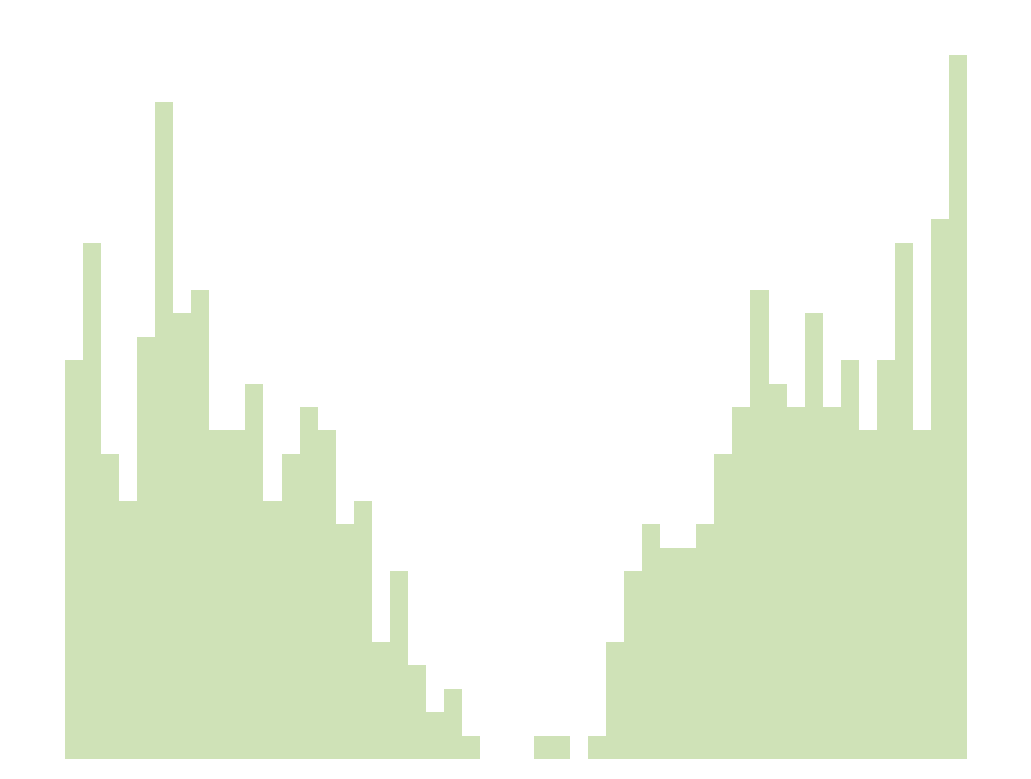

In [723]:
# original ccg
plt.bar(np.arange(50), xg[37:87], width=1, color='#cfe2b7'); plt.axis('off');
plt.savefig("../figures/C/orig_ccg.svg", transparent=True)

In [733]:
# shuffled ccg
shfl_xgrams = np.load('../notebooks/hippo_shfl_xgrams.npy', allow_pickle=True)
sxg = shfl_xgrams[36, 129]
sxg = sxg[::2] + sxg[1::2]

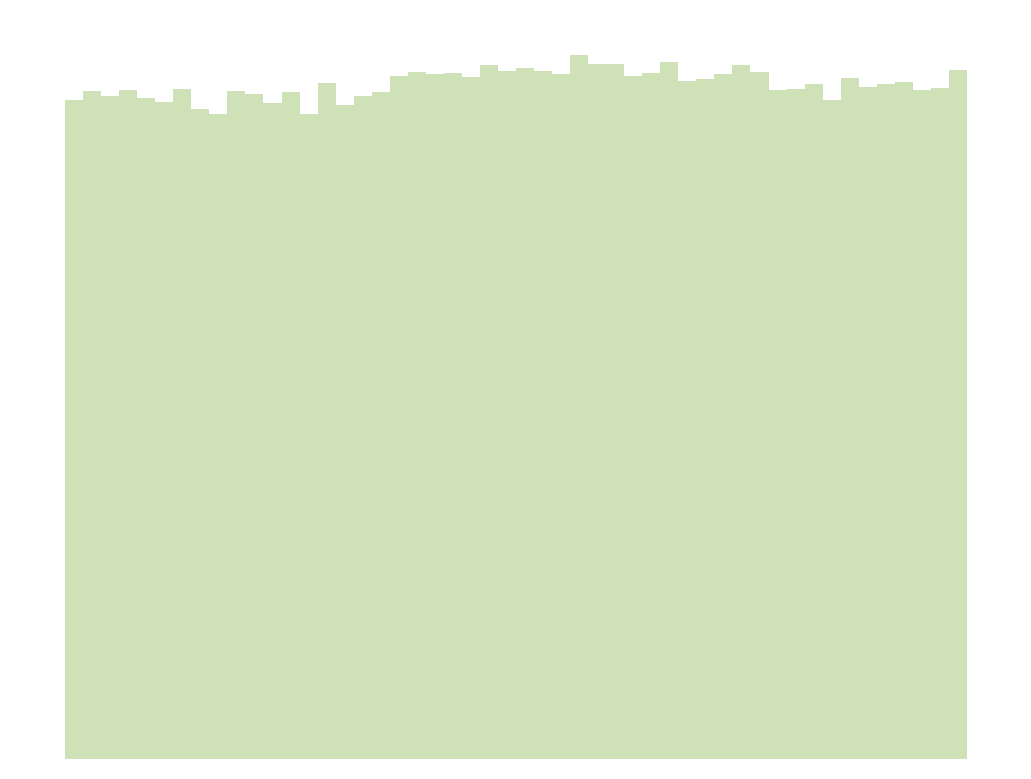

In [736]:
plt.bar(np.arange(50), sxg[37:87], width=1, color='#cfe2b7'); plt.axis('off');
plt.savefig("../figures/C/shfl_ccg.svg", transparent=True)

## Figure D - manual curation bar plot

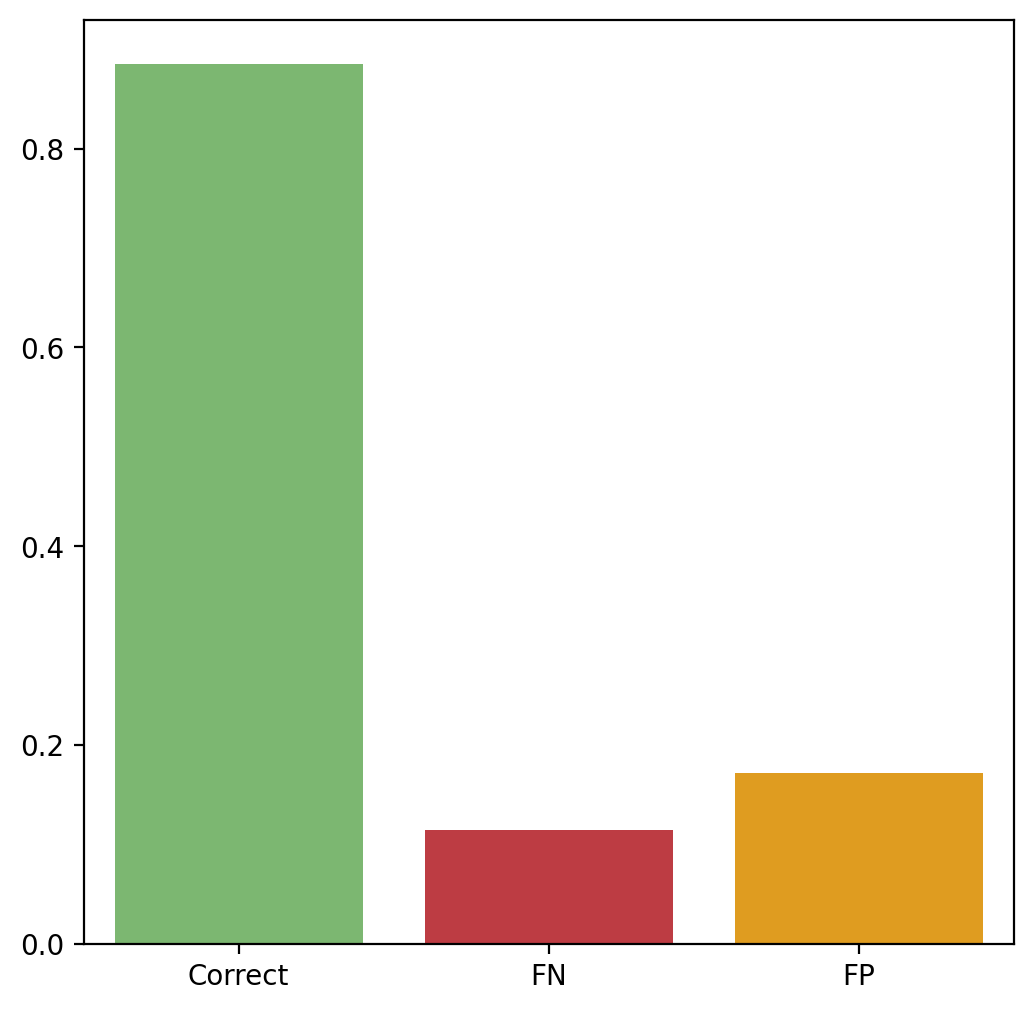

In [751]:
plt.figure(figsize= (6,6))
percs = [31/35, 4/35, 6/35]
labs = ["Correct", "FN", "FP"]
color = ['#74c365','#D22730','#ffa500']

sns.barplot(y=percs, x=labs, palette=color);
plt.savefig("../figures/D.svg", transparent=True)

## Figure E - burst detection vs GP

In [3]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import burst_detector as bd
import scipy.io
import math

%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(42)

In [4]:
t_154 = np.array(bd.find_times(times, clusters, 154), dtype='int32')
np.savetxt('t_154.txt', t_154)

In [5]:
x_154 = bd.fit_PoissonGP(t_154/30000, [1], [0, 2500], 1)

Optimization terminated successfully.
         Current function value: -15467.646361
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
         Hessian evaluations: 15


In [74]:
bursts_154 = pd.read_csv('./bursts_154.csv')[["level","start","end"]].to_numpy(dtype='float64')
bursts_154[:,1] = bursts_154[:,1]/30000
bursts_154[:,2] = bursts_154[:,2]/30000


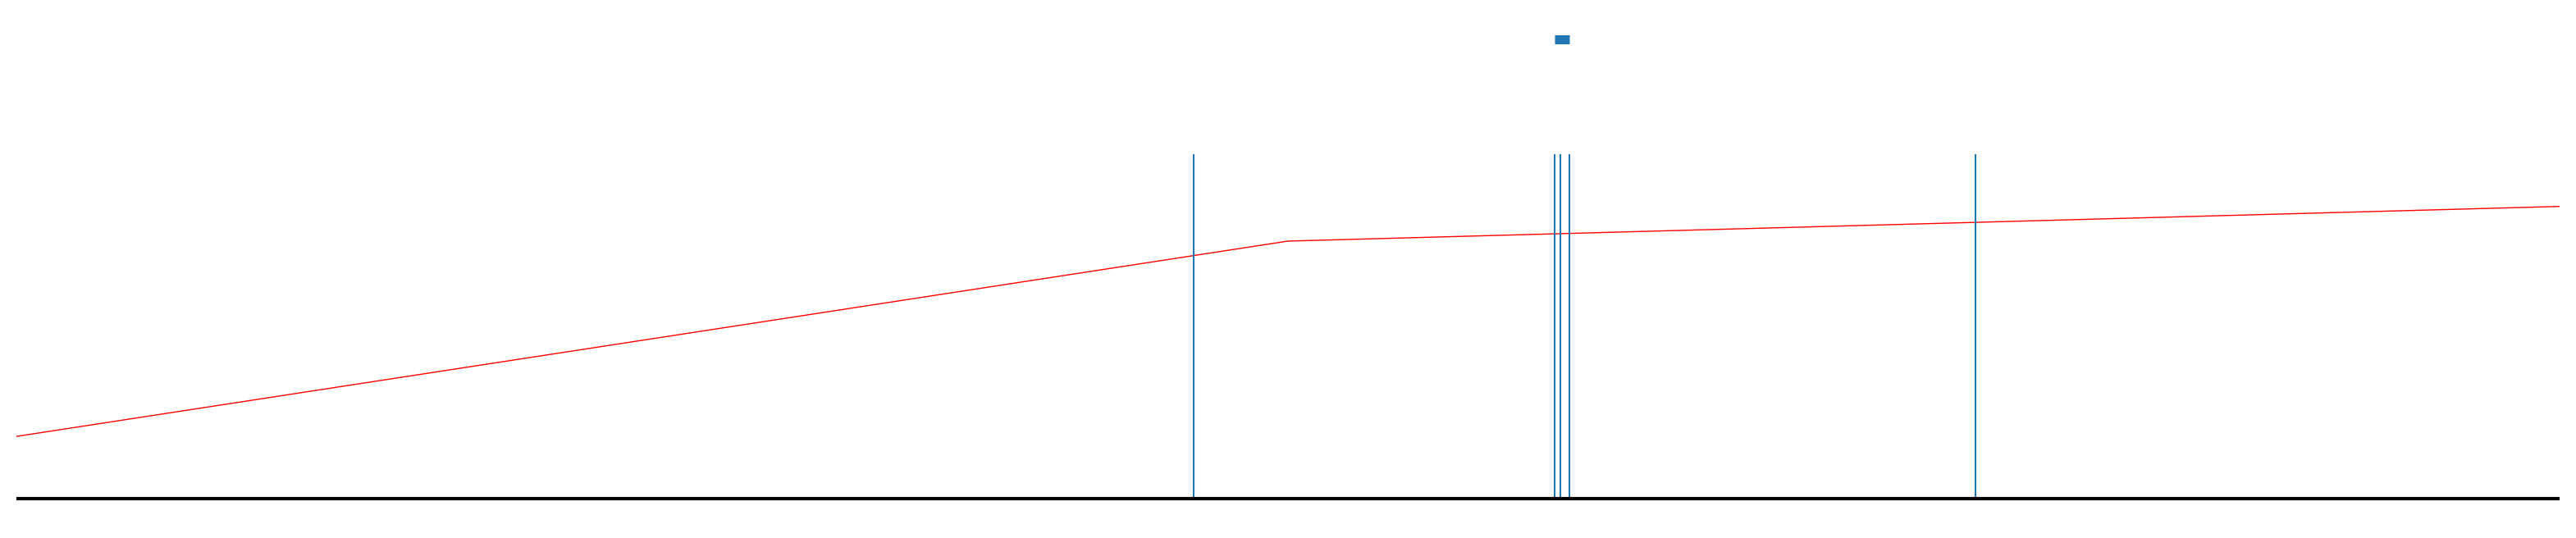

In [110]:
start = 16
end = 18

b_in = bursts_154[(bursts_154[:,1] > start) & (bursts_154[:,1] < end)]
b_in[b_in[:,0] > 2,0] = 2

plt.figure(figsize=(20,4))
plt.plot(x_154[start:end+1]/2, color='r', linewidth=.5);
marker, stem, base = plt.stem(t_154[(t_154 > start) & (t_154<end)]-start, np.ones_like(t_154[(t_154>start) & (t_154<end)]), markerfmt=' '); 
plt.hlines(b_in[:,0]/1.5, b_in[:,1]-start,  b_in[:,2]-start, linewidth=4);
plt.xlim([0, 2]);

plt.setp(stem, linewidth=.75)
plt.setp(base, 'color', 'k');
base.set_xdata([0,1])
base.set_transform(plt.gca().get_yaxis_transform())

plt.axis('off');
plt.savefig('../figures/E1.svg', transparent=True)

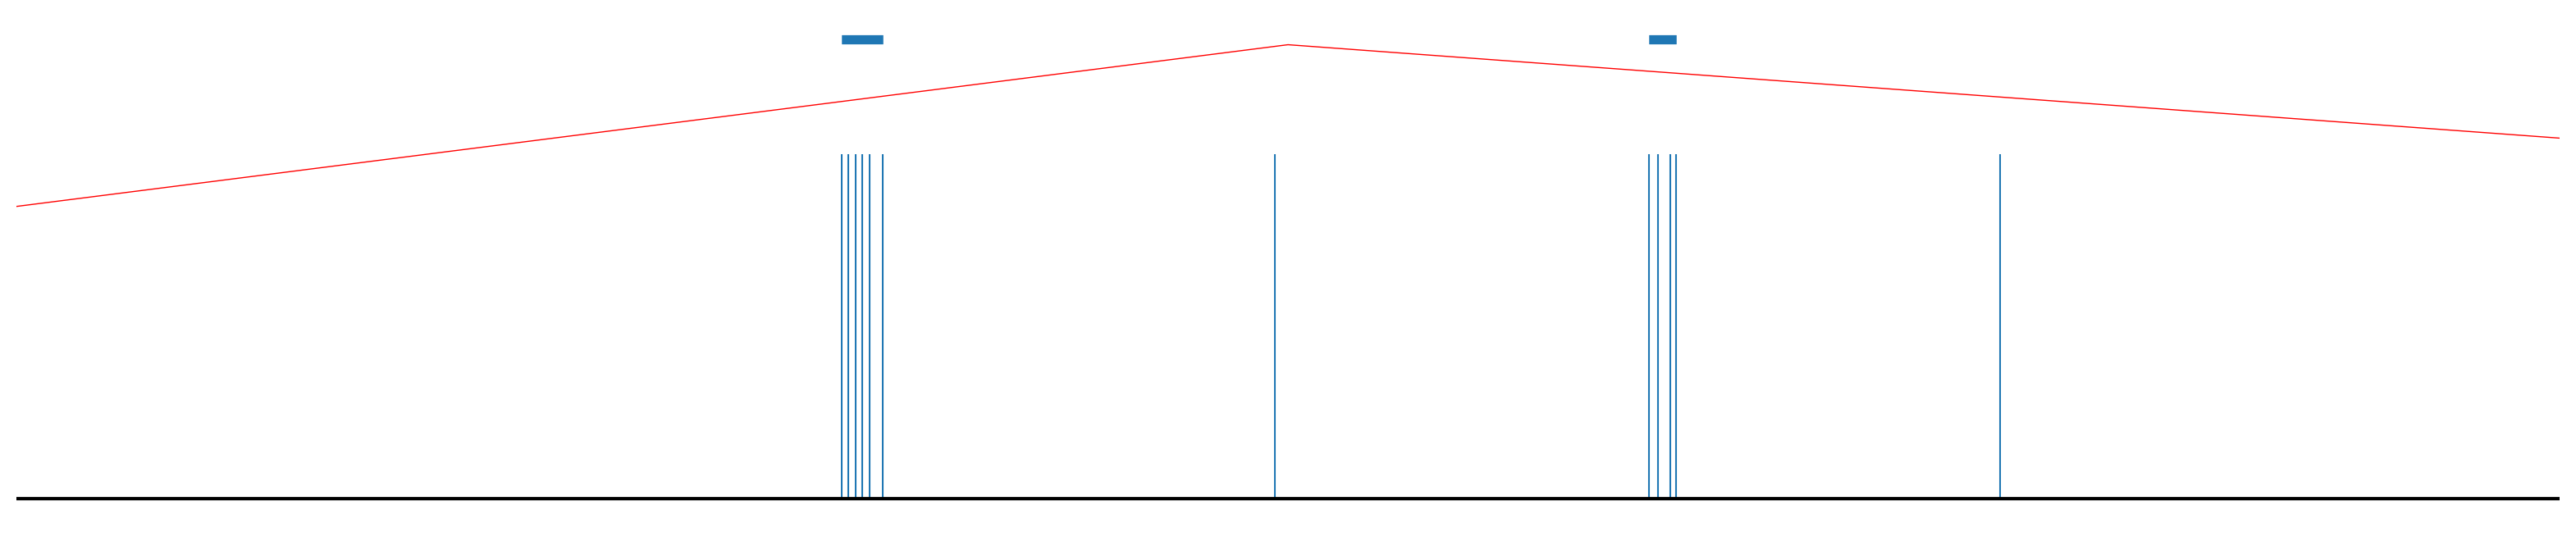

In [109]:
start = 18
end = 20

b_in = bursts_154[(bursts_154[:,1] > start) & (bursts_154[:,1] < end)]
b_in[b_in[:,0] > 2,0] = 2

plt.figure(figsize=(20,4))
plt.plot(x_154[start:end+1]/2, color='r', linewidth=.5);
marker, stem, base = plt.stem(t_154[(t_154 > start) & (t_154<end)]-start, np.ones_like(t_154[(t_154>start) & (t_154<end)]), markerfmt=' '); 
plt.hlines(b_in[:,0]/1.5, b_in[:,1]-start,  b_in[:,2]-start, linewidth=4);
plt.xlim([0, 2]);

plt.setp(stem, linewidth=.75)
plt.setp(base, 'color', 'k');
base.set_xdata([0,1])
base.set_transform(plt.gca().get_yaxis_transform())

plt.axis('off');
plt.savefig('../figures/E2.svg', transparent=True)

## Figure F - bursting before/after merging

In [180]:
t_74 = np.array(bd.find_times(times, clusters, 74), dtype='int32')
np.savetxt('t_74.txt', t_74)

t_79 = np.array(bd.find_times(times, clusters, 79), dtype='int32')
np.savetxt('t_79.txt', t_79)

In [181]:
merged = np.sort(np.hstack((t_74, t_79)))
np.savetxt('t_merged_74_79.txt', merged)
t_merged_74_79 = merged/30000

In [200]:
bursts_74 = pd.read_csv('./bursts_74.csv')[["level","start","end"]].to_numpy(dtype='float64')
bursts_74[:,1] = bursts_74[:,1]/30000
bursts_74[:,2] = bursts_74[:,2]/30000

bursts_79 = pd.read_csv('./bursts_79.csv')[["level","start","end"]].to_numpy(dtype='float64')
bursts_79[:,1] = bursts_79[:,1]/30000
bursts_79[:,2] = bursts_79[:,2]/30000

bursts_merged_74_79 = pd.read_csv('./bursts_merged_74_79.csv')[["level","start","end"]].to_numpy(dtype='float64')
bursts_merged_74_79[:,1] = bursts_merged_74_79[:,1]/30000
bursts_merged_74_79[:,2] = bursts_merged_74_79[:,2]/30000

In [219]:
start = 827
end = 835

t_74 = np.array(bd.find_times(times, clusters, 74))/30000
t_79 = np.array(bd.find_times(times, clusters, 79))/30000
b_in_74 = bursts_74[(bursts_74[:,1] > start) & (bursts_74[:,1] < end)]
b_in_79 = bursts_79[(bursts_79[:,1] > start) & (bursts_79[:,1] < end)]
b_in_merged = bursts_merged_74_79[(bursts_merged_74_79[:,1] > start) & (bursts_merged_74_79[:,1] < end)]

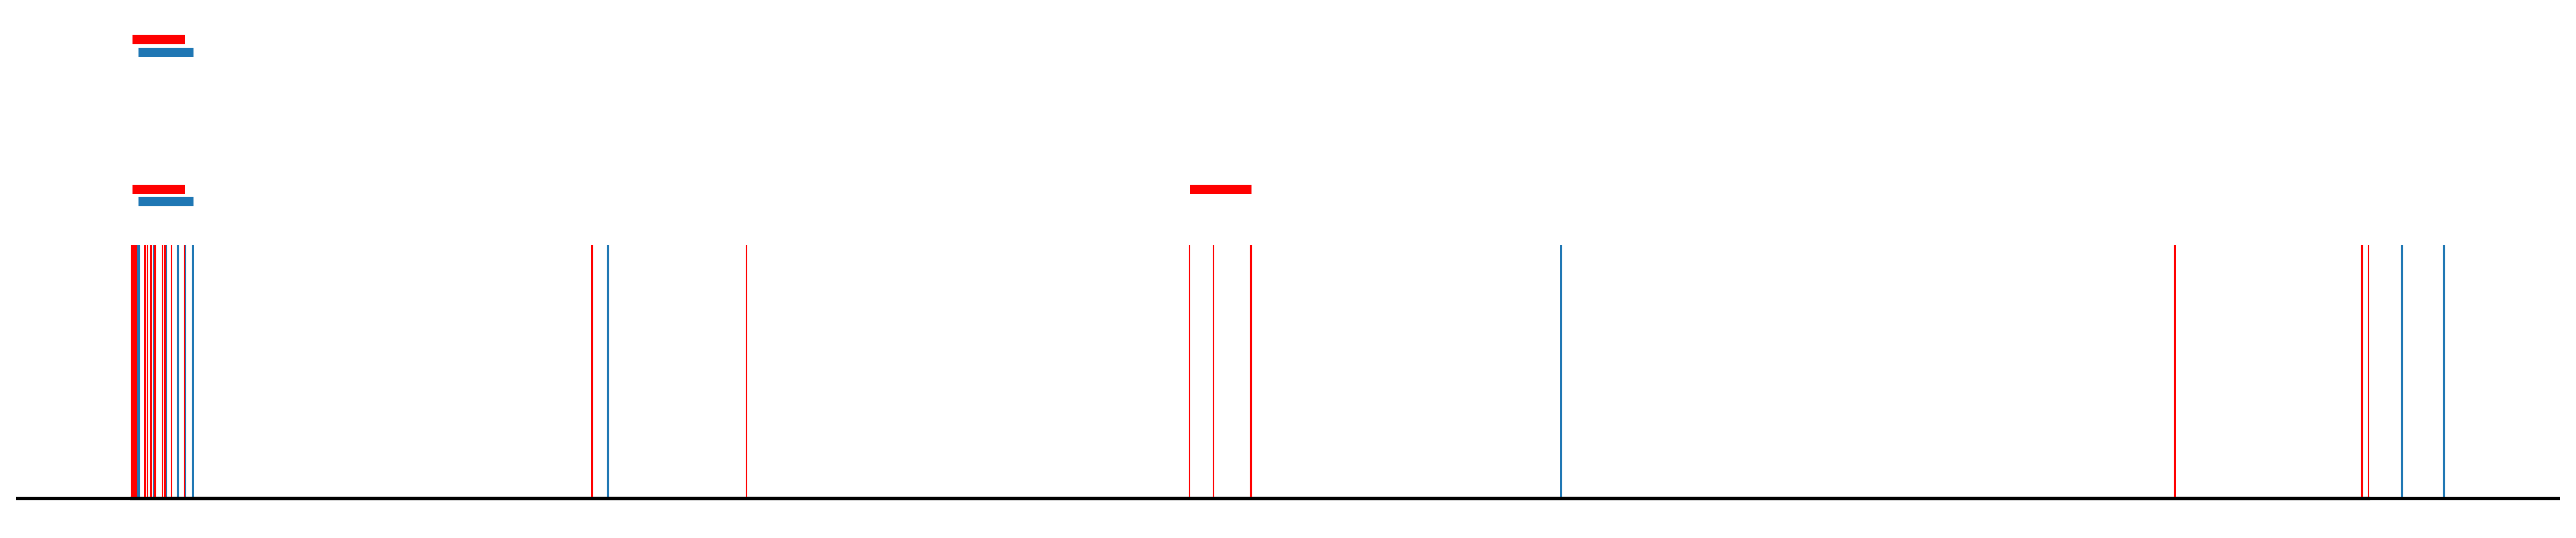

In [237]:
plt.figure(figsize=(20,4))
marker, stem, base = plt.stem(t_74[(t_74 > start) & (t_74<end)]-start, np.ones_like(t_74[(t_74>start) & (t_74<end)]), markerfmt=' '); 
marker2, stem2, base2 = plt.stem(t_79[(t_79 > start) & (t_79<end)]-start, np.ones_like(t_79[(t_79>start) & (t_79<end)]), markerfmt=' '); 
plt.hlines(b_in_74[:,0]/1.7, b_in_74[:,1]-start,  b_in_74[:,2]-start, linewidth=4);
plt.hlines(b_in_79[:,0]/1.7+.05, b_in_79[:,1]-start,  b_in_79[:,2]-start, linewidth=4, color='r');
plt.setp(stem2, 'color', 'r');

plt.setp(stem, linewidth=.75)
plt.setp(stem2, linewidth=.75)
plt.setp(base, 'color', 'k');
plt.setp(base2, 'color', 'k');
base.set_xdata([0,1])
base.set_transform(plt.gca().get_yaxis_transform()); plt.axis('off')

plt.savefig('../figures/F1.svg', transparent=True)

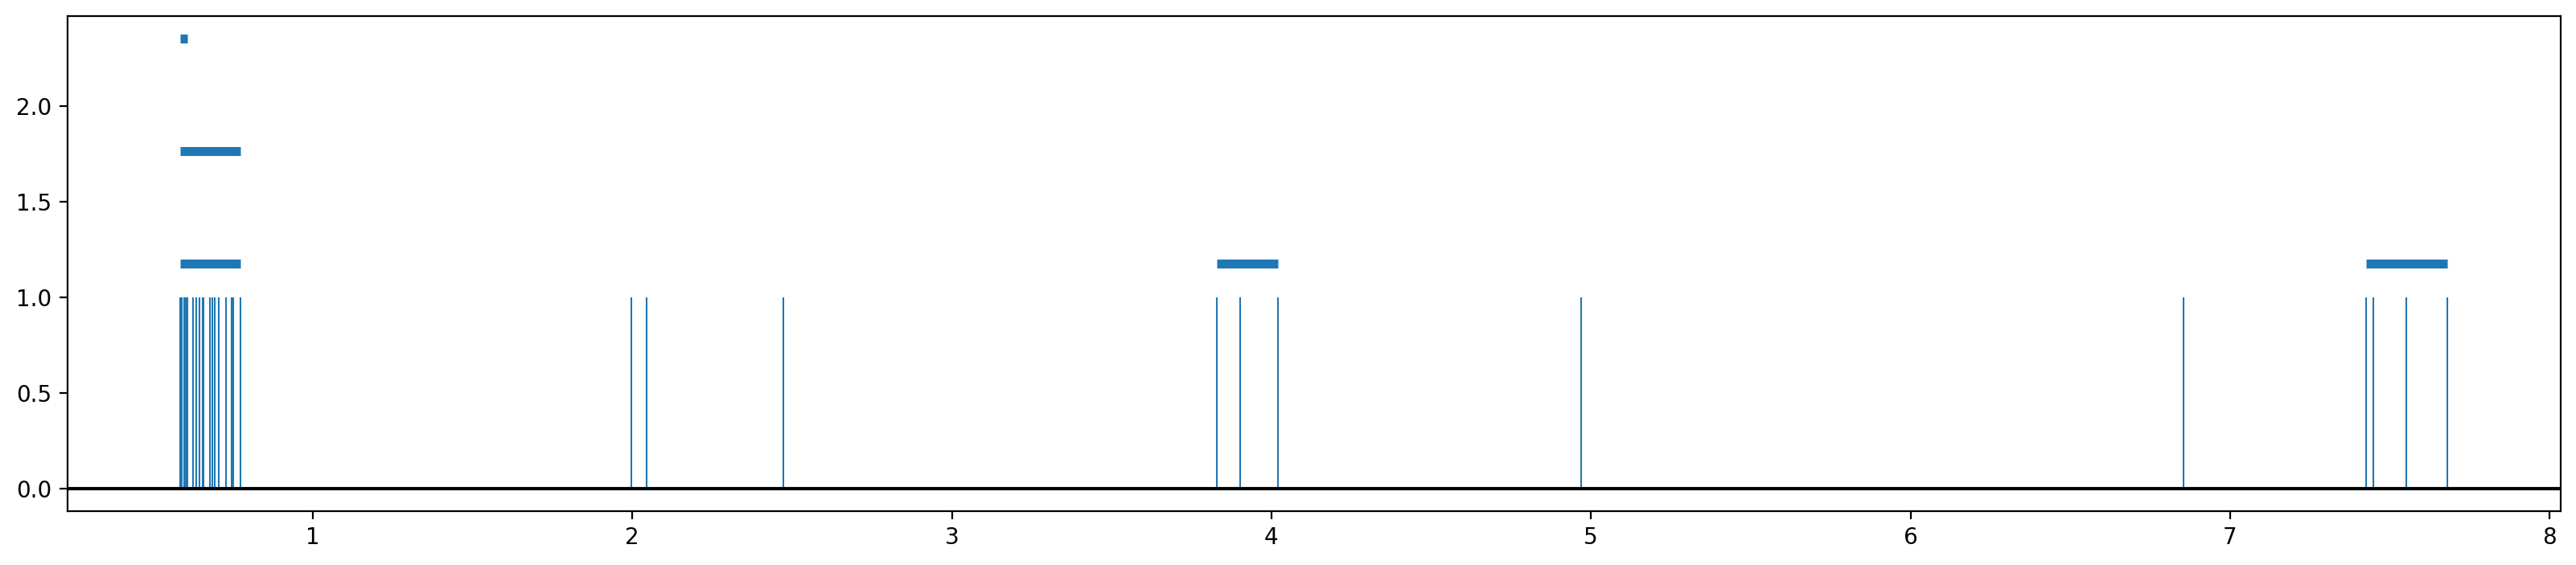

In [236]:
plt.figure(figsize=(20,4))
marker, stem, base = plt.stem(t_merged_74_79[(t_merged_74_79 > start) & (t_merged_74_79<end)]-start, np.ones_like(t_merged_74_79[(t_merged_74_79>start) & (t_merged_74_79<end)]), markerfmt=' '); 
plt.hlines(b_in_merged[:,0]/1.7, b_in_merged[:,1]-start,  b_in_merged[:,2]-start, linewidth=4);
plt.hlines(2/1.7        , 830.83033333-827, 831.01986667-827, linewidth=4)

plt.setp(stem, linewidth=.75)
plt.setp(base, 'color', 'k');
base.set_xdata([0,1])
base.set_transform(plt.gca().get_yaxis_transform())
plt.savefig('../figures/F2.svg', transparent=True)